# Pentathlon: Next Product to Buy Models

* Team-lead GitHub userid: rsm-amn
* Group name:39
* Team member names:
    - Aman Sharma
    - Harsh Jasrapuria
    - Sanjit Kangovi
    - Preetish Parikh

## Setup

Please complete this python notebook with your group by answering the questions in `pentathlon-nptb.pdf`.

Create a Notebook with all your results and comments and push the Notebook to GitHub when your team is done. Make sure to connect the GitHub repo to GradeScope before the due date. All results MUST be reproducible (i.e., the TA and I must be able to recreate your output from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the RSM-MSBA docker container.

> Note: Please do not install any packages as part of your Jupyter Notebook submission

This is a group assignment and you will be using Git and GitHub. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's changes to accept. The team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitHub. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `question1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file
* If you are going to work simultaneously, do it in different notebooks, e.g.,
    - model1.ipynb, question1.ipynb, etc.
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/github-group-workflow.png)

In [1]:
import pandas as pd
import pyrsm as rsm
import numpy as np

In [2]:
# setup pyrsm for autoreload
%reload_ext autoreload
%autoreload 2
%aimport pyrsm

In [3]:
## loading the data - this dataset must NOT be changed
pentathlon_nptb = pd.read_parquet("data/pentathlon_nptb.parquet")
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,4,0,4,0,1,1.0
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,0,0,1,0,0,0.0
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,0,0,0,2,2,1.0
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,0,0,0,0,0,1.0
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,2,0,0,2,2,0.0


In [4]:
training_data = pentathlon_nptb[pentathlon_nptb["training"] == 1]
training_data.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,4,0,4,0,1,1.0
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,0,0,0,2,2,1.0
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,0,0,0,0,0,1.0
5,U28,no,0,strength,< 30,yes,25000,18,0.3,0,0,0,0,0,0,1.0
8,U59,no,0,strength,>= 60,yes,65000,36,1.2,1,1,0,2,0,3,1.0


In [5]:
test_data = pentathlon_nptb[pentathlon_nptb["training"] == 0]
test_data.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,0,0,1,0,0,0.0
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,2,0,0,2,2,0.0
6,U30,no,0,endurance,< 30,yes,65000,62,0.5,1,5,0,5,3,2,0.0
7,U55,no,0,strength,30 to 44,no,35000,17,1.1,0,0,0,1,0,0,0.0
15,U97,no,0,endurance,< 30,yes,65000,40,0.7,4,6,1,1,1,1,0.0


In [6]:
# show dataset description
rsm.md("data/pentathlon_nptb_description.md")

## Pentathon: Next Product To Buy 

The available data is based on the last e-mail sent to each Pentathlon customer. Hence, an observation or row in the data is a "customer-promotional e-mail" pair. The data contains the following basic demographic information available to Pentathlon:

* "age": Customer age(coded in 4 buckets:"<30", "30 to 44", "45 to 59", and ">=60") 
* "female": Gender identity coded as Female "yes" or "no"
* "income": Income in Euros, rounded to the nearest EUR5,000
* "education": Percentage of college graduates in the customer's neighborhood, coded from 0-100
* "children": Average number of children in the customer's neighborhood

The data also contains basic historical information about customer purchases, specifically, a department-specific frequency measure.

* "freq_endurance-freq_racquet": Number of purchases in each department in the last year, excluding any purchase in response to the last email.

The key outcome variables are:

* "buyer": Did the customer click on the e-mail and complete a purchase within two days of receiving the e-mail ("yes" or "no")?
* "total_os": Total order size (in Euros) conditional on the customer having purchased (buyer == "yes"). This measures spending across all departments, not just the department that sent the message

> Note: In addition to the six message groups, a seventh group of customers received no promotional e-mails for the duration of the test ("control").

In [7]:
# show the content another notebook
rsm.md_notebook("./sub-notebooks/model1.ipynb")


# A sub-notebook for the main notebook
... insert text to describe the motivation for the model estimated below ...
```python
lrc = rsm.model.logistic(
    data={"pentathlon_nptb": pentathlon_nptb},
    rvar="buyer",
    lev="yes",
    evar=["message", "age"]
)
lrc.summary()
```
... insert text to describe the results estimated above ...
```python
print("Some printed text ...")
```
```python

```


In [8]:
# run python code from another notebook
%run ./sub-notebooks/model1.ipynb

Logistic regression (GLM)
Data                 : pentathlon_nptb
Response variable    : buyer
Level                : yes
Explanatory variables: message, age
Null hyp.: There is no effect of x on buyer
Alt. hyp.: There is an effect of x on buyer

                       OR     OR%  coefficient  std.error  z.value p.value     
Intercept           0.013  -98.7%       -4.337      0.034 -126.939  < .001  ***
message[control]    0.946   -5.4%       -0.055      0.032   -1.718   0.086    .
message[endurance]  1.109   10.9%        0.103      0.031    3.307  < .001  ***
message[racquet]    0.965   -3.5%       -0.036      0.032   -1.121   0.262     
message[strength]   1.063    6.3%        0.061      0.032    1.945   0.052    .
message[team]       1.024    2.4%        0.024      0.032    0.755    0.45     
message[water]      1.037    3.7%        0.036      0.032    1.146   0.252     
age[30 to 44]       2.421  142.1%        0.884      0.030   29.315  < .001  ***
age[45 to 59]       2.159  115.9% 

In [9]:
# importing functions from a module/package
from utils import functions

functions.example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



In [10]:
## Question answers

# Assignment

In [11]:
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats as sms
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn import preprocessing
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
pentathlon_nptb = pd.read_parquet("data/pentathlon_nptb.parquet")
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,4,0,4,0,1,1.0
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,0,0,1,0,0,0.0
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,0,0,0,2,2,1.0
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,0,0,0,0,0,1.0
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,2,0,0,2,2,0.0


In [13]:
pentathlon_nptb.dtypes

custid                object
buyer               category
total_os               int32
message             category
age                 category
female              category
income                 int32
education              int32
children             float64
freq_endurance         int32
freq_strength          int32
freq_water             int32
freq_team              int32
freq_backcountry       int32
freq_racquet           int32
training             float64
dtype: object

In [14]:
pentathlon_nptb.isna().sum()

custid              0
buyer               0
total_os            0
message             0
age                 0
female              0
income              0
education           0
children            0
freq_endurance      0
freq_strength       0
freq_water          0
freq_team           0
freq_backcountry    0
freq_racquet        0
training            0
dtype: int64

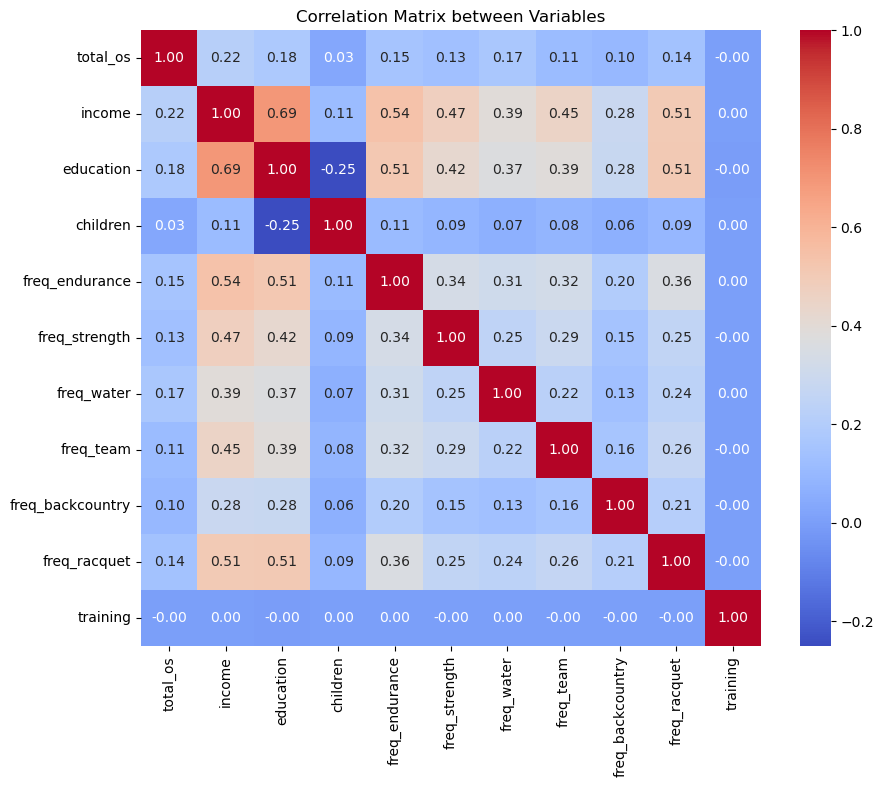

In [15]:
np.random.seed(0)

corr_matrix = pentathlon_nptb[["total_os", "income", "education", "children", "freq_endurance", "freq_strength", "freq_water", "freq_team", "freq_backcountry", "freq_racquet", "training"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Variables')
plt.show()

The correlation matrix reveals that income and education are the most influential factors, strongly correlated with each other (0.69) and moderately linked to purchase frequency across sports categories, particularly endurance (0.54) and racquet sports (0.51). Total order size is positively associated with income (0.22) and education (0.18), indicating that higher-income and more educated customers tend to spend more. While purchase frequencies across sports categories show moderate inter-correlations (e.g., Endurance & Strength: 0.34), demographic factors like the number of children have little impact on purchasing behavior. The training variable has no meaningful correlation, confirming it serves as a dataset split indicator. These insights suggest that targeting high-income, well-educated customers with tailored promotions could maximize profitability.

In [16]:
percentage_training = (len(pentathlon_nptb[pentathlon_nptb["training"] == 1]) / len(pentathlon_nptb)) * 100
print(f"% of Training data from the total data: {percentage_training:.2f}%")

percentage_test = (len(pentathlon_nptb[pentathlon_nptb["training"] == 0]) / len(pentathlon_nptb)) * 100
print(f"% of Test data from the total data: {percentage_test:.2f}%")

% of Training data from the total data: 70.00%
% of Test data from the total data: 30.00%


We can see that the age is in categories, which are not suitable for calculations. So we put the age into numeric brackets.

1. Less than 30 → 1
2. 30 to 44 → 2
3. 45 to 59 → 3
4. Greater than Equal to 60 → 4

In [17]:
training_data = pentathlon_nptb[pentathlon_nptb["training"] == 1]
test_data = pentathlon_nptb[pentathlon_nptb["training"] == 0]

age_mapping = {"< 30": 1, "30 to 44": 2, "45 to 59": 3, ">= 60": 4}
training_data["age"] = training_data["age"].map(age_mapping)
test_data["age"] = test_data["age"].map(age_mapping)

/tmp/ipykernel_63643/663572031.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data["age"] = training_data["age"].map(age_mapping)
/tmp/ipykernel_63643/663572031.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["age"] = test_data["age"].map(age_mapping)


In [18]:
(training_data).head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training
0,U1,no,0,team,2,no,55000,19,0.8,0,4,0,4,0,1,1.0
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,0,0,0,2,2,1.0
3,U20,no,0,water,3,yes,25000,24,0.2,0,0,0,0,0,0,1.0
5,U28,no,0,strength,1,yes,25000,18,0.3,0,0,0,0,0,0,1.0
8,U59,no,0,strength,4,yes,65000,36,1.2,1,1,0,2,0,3,1.0


In [19]:
(test_data).head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,0,0,1,0,0,0.0
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,2,0,0,2,2,0.0
6,U30,no,0,endurance,1,yes,65000,62,0.5,1,5,0,5,3,2,0.0
7,U55,no,0,strength,2,no,35000,17,1.1,0,0,0,1,0,0,0.0
15,U97,no,0,endurance,1,yes,65000,40,0.7,4,6,1,1,1,1,0.0


### Logistic Model

Working with the Training Data

In [20]:
pentathlon_nptb["buyer_yes"] = rsm.ifelse(pentathlon_nptb.buyer == "yes", 1, rsm.ifelse(pentathlon_nptb.buyer == "no", 0, pd.NA))
pentathlon_nptb.buyer_yes.value_counts(dropna=False)

buyer_yes
0    585600
1     14400
Name: count, dtype: int64

In [21]:
pd.crosstab(pentathlon_nptb["buyer"], training_data["buyer"])

buyer,yes,no
buyer,,
yes,10080,0
no,0,409920


In [22]:
training_data["buyer_yes"] = rsm.ifelse(training_data.buyer == "yes", 1, rsm.ifelse(training_data.buyer == "no", 0, pd.NA))
training_data.buyer_yes.value_counts(dropna=False)

/tmp/ipykernel_63643/829334470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data["buyer_yes"] = rsm.ifelse(training_data.buyer == "yes", 1, rsm.ifelse(training_data.buyer == "no", 0, pd.NA))


buyer_yes
0    409920
1     10080
Name: count, dtype: int64

In [23]:
evar_list = [
    "age", "female", "income", "education", "children",
    "freq_endurance", "freq_strength", "freq_water", "freq_team",
    "freq_backcountry", "freq_racquet"]

In [24]:
clf = rsm.model.logistic(data={"pentathlon_nptb": pentathlon_nptb[pentathlon_nptb.training == 1]}, rvar="buyer", lev="yes", evar=evar_list)
clf.summary(vif=True)

Logistic regression (GLM)
Data                 : pentathlon_nptb
Response variable    : buyer
Level                : yes
Explanatory variables: age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Null hyp.: There is no effect of x on buyer
Alt. hyp.: There is an effect of x on buyer

                     OR      OR%  coefficient  std.error  z.value p.value     
Intercept         0.000  -100.0%       -8.221      0.058 -141.954  < .001  ***
age[30 to 44]     2.377   137.7%        0.866      0.039   22.267  < .001  ***
age[45 to 59]     2.182   118.2%        0.780      0.040   19.528  < .001  ***
age[>= 60]        1.200    20.0%        0.182      0.048    3.784  < .001  ***
female[no]        1.354    35.4%        0.303      0.024   12.612  < .001  ***
income            1.000     0.0%        0.000      0.000   22.078  < .001  ***
education         1.037     3.7%        0.037      0.001   32.747  < .001  ***
children

In [25]:
clf1 = rsm.model.logistic(data={"pentathlon_nptb": pentathlon_nptb[pentathlon_nptb.training == 1]}, rvar="buyer", lev="yes", evar=[
    "age", "female", "income", "children",
    "freq_endurance", "freq_strength", "freq_water", "freq_team",
    "freq_backcountry", "freq_racquet"])
clf1.summary()

Logistic regression (GLM)
Data                 : pentathlon_nptb
Response variable    : buyer
Level                : yes
Explanatory variables: age, female, income, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Null hyp.: There is no effect of x on buyer
Alt. hyp.: There is an effect of x on buyer

                     OR     OR%  coefficient  std.error  z.value p.value     
Intercept         0.001  -99.9%       -7.511      0.053 -140.458  < .001  ***
age[30 to 44]     2.297  129.7%        0.831      0.039   21.296  < .001  ***
age[45 to 59]     2.287  128.7%        0.827      0.040   20.584  < .001  ***
age[>= 60]        1.271   27.1%        0.240      0.049    4.940  < .001  ***
female[no]        1.338   33.8%        0.291      0.024   12.044  < .001  ***
income            1.000    0.0%        0.000      0.000   49.217  < .001  ***
children          1.007    0.7%        0.007      0.027    0.258   0.796     
freq_endurance    1.142   1

Creating Predictions

In [26]:
distinct_messages = pd.DataFrame(pentathlon_nptb["message"].unique(), columns=["Distinct Messages"])
print(distinct_messages)

  Distinct Messages
0              team
1       backcountry
2         endurance
3             water
4           racquet
5          strength
6           control


In [27]:
pentathlon_nptb["p_endurance"] = clf.predict(pentathlon_nptb.assign(message="endurance"))["prediction"]
pentathlon_nptb["p_strength"] = clf.predict(pentathlon_nptb.assign(message="strength"))["prediction"]
pentathlon_nptb["p_water"] = clf.predict(pentathlon_nptb.assign(message="water"))["prediction"]
pentathlon_nptb["p_team"] = clf.predict(pentathlon_nptb.assign(message="team"))["prediction"]
pentathlon_nptb["p_backcountry"] = clf.predict(pentathlon_nptb.assign(message="backcountry"))["prediction"]
pentathlon_nptb["p_racquet"] = clf.predict(pentathlon_nptb.assign(message="racquet"))["prediction"]
pentathlon_nptb["p_control"] = clf.predict(pentathlon_nptb.assign(message="control"))["prediction"]
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,freq_racquet,training,buyer_yes,p_endurance,p_strength,p_water,p_team,p_backcountry,p_racquet,p_control
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,1,1.0,0,0.013275,0.013275,0.013275,0.013275,0.013275,0.013275,0.013275
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,0,0.0,0,0.005417,0.005417,0.005417,0.005417,0.005417,0.005417,0.005417
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,2,1.0,0,0.010110,0.010110,0.010110,0.010110,0.010110,0.010110,0.010110
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,0,1.0,0,0.002366,0.002366,0.002366,0.002366,0.002366,0.002366,0.002366
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,2,0.0,0,0.012437,0.012437,0.012437,0.012437,0.012437,0.012437,0.012437


In [28]:
pentathlon_nptb["to_offer"] = pentathlon_nptb[["p_endurance", "p_strength", "p_water", "p_team", "p_backcountry", "p_racquet"]].idxmax(axis=1)

pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,training,buyer_yes,p_endurance,p_strength,p_water,p_team,p_backcountry,p_racquet,p_control,to_offer
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,1.0,0,0.013275,0.013275,0.013275,0.013275,0.013275,0.013275,0.013275,p_endurance
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,0.0,0,0.005417,0.005417,0.005417,0.005417,0.005417,0.005417,0.005417,p_endurance
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,1.0,0,0.010110,0.010110,0.010110,0.010110,0.010110,0.010110,0.010110,p_endurance
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,1.0,0,0.002366,0.002366,0.002366,0.002366,0.002366,0.002366,0.002366,p_endurance
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,0.0,0,0.012437,0.012437,0.012437,0.012437,0.012437,0.012437,0.012437,p_endurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,>= 60,yes,40000,26,0.6,0,...,1.0,0,0.002186,0.002186,0.002186,0.002186,0.002186,0.002186,0.002186,p_endurance
599996,U3462900,no,0,team,< 30,no,55000,32,0.9,3,...,0.0,0,0.007515,0.007515,0.007515,0.007515,0.007515,0.007515,0.007515,p_endurance
599997,U3462902,no,0,team,< 30,yes,55000,32,0.9,0,...,1.0,0,0.009330,0.009330,0.009330,0.009330,0.009330,0.009330,0.009330,p_endurance
599998,U3462916,no,0,team,< 30,no,50000,35,0.6,2,...,0.0,0,0.006767,0.006767,0.006767,0.006767,0.006767,0.006767,0.006767,p_endurance


In [29]:
repl = {"p_endurance": "Endurance", "p_strength": "Strength", "p_water": "Water", "p_team": "Team", "p_backcountry": "Backcountry", "p_racquet": "Racquet", "p_control": "Control"}

pentathlon_nptb["to_offer"] = pentathlon_nptb[["p_endurance", "p_strength", "p_water", "p_team", "p_backcountry", "p_racquet"]].idxmax(axis=1).map(repl)
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,training,buyer_yes,p_endurance,p_strength,p_water,p_team,p_backcountry,p_racquet,p_control,to_offer
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,1.0,0,0.013275,0.013275,0.013275,0.013275,0.013275,0.013275,0.013275,Endurance
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,0.0,0,0.005417,0.005417,0.005417,0.005417,0.005417,0.005417,0.005417,Endurance
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,1.0,0,0.010110,0.010110,0.010110,0.010110,0.010110,0.010110,0.010110,Endurance
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,1.0,0,0.002366,0.002366,0.002366,0.002366,0.002366,0.002366,0.002366,Endurance
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,0.0,0,0.012437,0.012437,0.012437,0.012437,0.012437,0.012437,0.012437,Endurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,>= 60,yes,40000,26,0.6,0,...,1.0,0,0.002186,0.002186,0.002186,0.002186,0.002186,0.002186,0.002186,Endurance
599996,U3462900,no,0,team,< 30,no,55000,32,0.9,3,...,0.0,0,0.007515,0.007515,0.007515,0.007515,0.007515,0.007515,0.007515,Endurance
599997,U3462902,no,0,team,< 30,yes,55000,32,0.9,0,...,1.0,0,0.009330,0.009330,0.009330,0.009330,0.009330,0.009330,0.009330,Endurance
599998,U3462916,no,0,team,< 30,no,50000,35,0.6,2,...,0.0,0,0.006767,0.006767,0.006767,0.006767,0.006767,0.006767,0.006767,Endurance


In [30]:
pentathlon_nptb["p_max"] = pentathlon_nptb[["p_endurance", "p_strength", "p_water", "p_team", "p_backcountry", "p_racquet", "p_control"]].max(axis=1)

Lets create a `crosstab` to see which categories(s) Pentathlon should offer their customers

In [31]:
pd.crosstab(index=pentathlon_nptb[pentathlon_nptb.training == 0].to_offer, columns="count").apply(rsm.format_nr)

col_0,count
to_offer,
Endurance,"180,000"


This does not look very customized! The model predicts that every customer should be sent the Endurance ads. The (deliberate) mistake in the analysis above was that the specified model is not sufficiently flexible to allow customization across customers!

The whole point of customization is that different offers may work better for different customers. In other words, we want to customize offers because we think that there might be an interaction between (1) who the customer is and (2) how effective the offer is. Hence, we need to interact `message` with the variables that describe customer characteristics. For convenience, lets just interact `message` will all available customer variables. The model output is shown below:

In [32]:
evar = pentathlon_nptb.columns.to_list()
evar = evar[evar.index("message") :]
evar = evar[: evar.index("training")]
evar

['message',
 'age',
 'female',
 'income',
 'education',
 'children',
 'freq_endurance',
 'freq_strength',
 'freq_water',
 'freq_team',
 'freq_backcountry',
 'freq_racquet']

In [33]:
ivar = [f"{e}:message" for e in evar if e != "message"]
ivar

['age:message',
 'female:message',
 'income:message',
 'education:message',
 'children:message',
 'freq_endurance:message',
 'freq_strength:message',
 'freq_water:message',
 'freq_team:message',
 'freq_backcountry:message',
 'freq_racquet:message']

In [34]:
clf_i = rsm.model.logistic(data={"pentathlon_nptb": pentathlon_nptb[pentathlon_nptb.training == 1]}, rvar="buyer", lev="yes", evar=evar, ivar=ivar)
clf_i.summary()

Logistic regression (GLM)
Data                 : pentathlon_nptb
Response variable    : buyer
Level                : yes
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Null hyp.: There is no effect of x on buyer
Alt. hyp.: There is an effect of x on buyer

                                        OR      OR%  coefficient  std.error  z.value p.value     
Intercept                            0.000  -100.0%       -8.251      0.153  -53.948  < .001  ***
message[control]                     1.115    11.5%        0.109      0.220    0.496    0.62     
message[endurance]                   1.199    19.9%        0.181      0.213    0.850   0.395     
message[racquet]                     1.084     8.4%        0.080      0.217    0.370   0.711     
message[strength]                    0.959    -4.1%       -0.042      0.216   -0.195   0.846     
message[team]                        0.881 

Now lets repeat the previous analysis steps but using the results from the
new, more flexible, model. Start by generating predictions. Provide the name `p_endurance_i`, `p_strenght_i`, and so on to store the predictions from the model with interactions

In [35]:
pentathlon_nptb['pred_logit'] = clf_i.predict(pentathlon_nptb)['prediction']

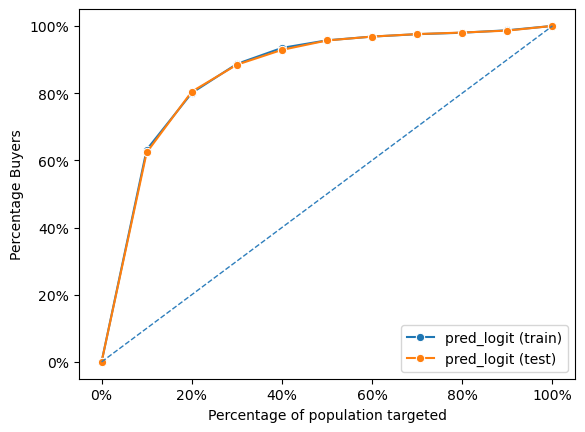

In [36]:
dct = {"train": pentathlon_nptb[pentathlon_nptb['training'] == 1], "test": pentathlon_nptb[pentathlon_nptb['training'] == 0]}

fig1 = rsm.gains_plot(dct, "buyer", "yes", "pred_logit")

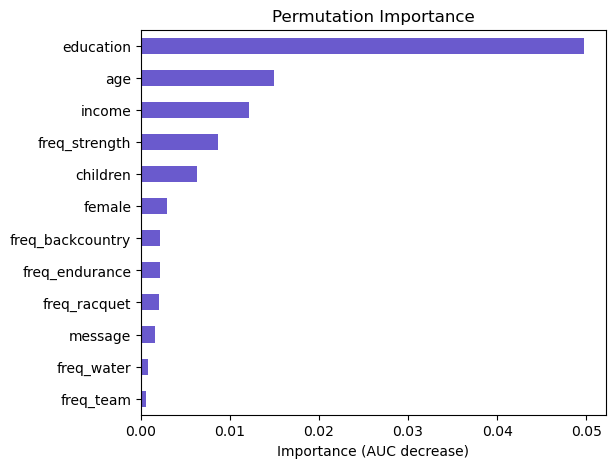

In [37]:
clf_i.plot("vimp")

In [38]:
pentathlon_nptb["p_endurance_i"] = clf_i.predict(pentathlon_nptb.assign(message="endurance"))["prediction"]
pentathlon_nptb["p_strength_i"] = clf_i.predict(pentathlon_nptb.assign(message="strength"))["prediction"]
pentathlon_nptb["p_water_i"] = clf_i.predict(pentathlon_nptb.assign(message="water"))["prediction"]
pentathlon_nptb["p_team_i"] = clf_i.predict(pentathlon_nptb.assign(message="team"))["prediction"]
pentathlon_nptb["p_backcountry_i"] = clf_i.predict(pentathlon_nptb.assign(message="backcountry"))["prediction"]
pentathlon_nptb["p_racquet_i"] = clf_i.predict(pentathlon_nptb.assign(message="racquet"))["prediction"]
pentathlon_nptb["p_control_i"] = clf_i.predict(pentathlon_nptb.assign(message="control"))["prediction"]
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,to_offer,p_max,pred_logit,p_endurance_i,p_strength_i,p_water_i,p_team_i,p_backcountry_i,p_racquet_i,p_control_i
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,Endurance,0.013275,0.012008,0.015682,0.015452,0.012604,0.012008,0.011131,0.014499,0.012022
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,Endurance,0.005417,0.005556,0.006014,0.005475,0.004981,0.005279,0.005556,0.005858,0.004605
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,Endurance,0.010110,0.013884,0.013884,0.009343,0.009680,0.009533,0.010718,0.008789,0.009140
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,Endurance,0.002366,0.002389,0.002970,0.002196,0.002389,0.002264,0.002339,0.002089,0.002252
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,Endurance,0.012437,0.012039,0.019675,0.011463,0.011437,0.011119,0.011526,0.012039,0.010784


In [39]:
repl_i = {"p_endurance_i": "Endurance", "p_strength_i": "Strength", "p_water_i": "Water", "p_team_i": "Team", "p_backcountry_i": "Backcountry", "p_racquet_i": "Racquet", "p_control_i": "Control"}

pentathlon_nptb["to_offer_i"] = pentathlon_nptb[["p_endurance_i", "p_strength_i", "p_water_i", "p_team_i", "p_backcountry_i", "p_racquet_i", "p_control_i"]].idxmax(axis=1).map(repl_i)
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,p_max,pred_logit,p_endurance_i,p_strength_i,p_water_i,p_team_i,p_backcountry_i,p_racquet_i,p_control_i,to_offer_i
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,0.013275,0.012008,0.015682,0.015452,0.012604,0.012008,0.011131,0.014499,0.012022,Endurance
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,0.005417,0.005556,0.006014,0.005475,0.004981,0.005279,0.005556,0.005858,0.004605,Endurance
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,0.010110,0.013884,0.013884,0.009343,0.009680,0.009533,0.010718,0.008789,0.009140,Endurance
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,0.002366,0.002389,0.002970,0.002196,0.002389,0.002264,0.002339,0.002089,0.002252,Endurance
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,0.012437,0.012039,0.019675,0.011463,0.011437,0.011119,0.011526,0.012039,0.010784,Endurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,>= 60,yes,40000,26,0.6,0,...,0.002186,0.002042,0.003217,0.002089,0.002042,0.001946,0.001947,0.002118,0.001966,Endurance
599996,U3462900,no,0,team,< 30,no,55000,32,0.9,3,...,0.007515,0.007692,0.007731,0.008117,0.005832,0.007692,0.007884,0.008257,0.006959,Racquet
599997,U3462902,no,0,team,< 30,yes,55000,32,0.9,0,...,0.009330,0.008225,0.011345,0.009822,0.008286,0.008225,0.010062,0.008976,0.008535,Endurance
599998,U3462916,no,0,team,< 30,no,50000,35,0.6,2,...,0.006767,0.006796,0.006971,0.007284,0.005272,0.006796,0.007164,0.007352,0.006378,Racquet


In [40]:
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,p_max,pred_logit,p_endurance_i,p_strength_i,p_water_i,p_team_i,p_backcountry_i,p_racquet_i,p_control_i,to_offer_i
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,0.013275,0.012008,0.015682,0.015452,0.012604,0.012008,0.011131,0.014499,0.012022,Endurance
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,0.005417,0.005556,0.006014,0.005475,0.004981,0.005279,0.005556,0.005858,0.004605,Endurance
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,0.010110,0.013884,0.013884,0.009343,0.009680,0.009533,0.010718,0.008789,0.009140,Endurance
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,0.002366,0.002389,0.002970,0.002196,0.002389,0.002264,0.002339,0.002089,0.002252,Endurance
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,0.012437,0.012039,0.019675,0.011463,0.011437,0.011119,0.011526,0.012039,0.010784,Endurance


In [41]:
pentathlon_nptb["p_max_i"] = pentathlon_nptb[["p_endurance_i", "p_strength_i", "p_water_i", "p_team_i", "p_backcountry_i", "p_racquet_i", "p_control_i"]].max(axis=1)

In [42]:
#percentage of each offer
pd.crosstab(index=pentathlon_nptb[pentathlon_nptb.training == 0].to_offer_i, columns="count", normalize='columns').apply(lambda x: rsm.format_nr(x * 100))

col_0,count
to_offer_i,
Backcountry,0.8
Endurance,69.92
Racquet,6.83
Strength,20.32
Team,0.93
Water,1.18


Total OS Calculation

In [43]:
lr_int1 = rsm.model.regress(
    data={"pentathlon": pentathlon_nptb.query("training == 1")},
    rvar="total_os",
    evar= evar,
)
lr_int1.summary()

Linear regression (OLS)
Data                 : pentathlon
Response variable    : total_os
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Null hyp.: the effect of x on total_os is zero
Alt. hyp.: the effect of x on total_os is not zero

                    coefficient  std.error  t.value p.value     
Intercept                -5.553      0.107  -51.731  < .001  ***
message[control]         -0.424      0.073   -5.846  < .001  ***
message[endurance]        0.059      0.074    0.802   0.423     
message[racquet]         -0.180      0.073   -2.477   0.013    *
message[strength]         0.024      0.073    0.326   0.744     
message[team]            -0.141      0.073   -1.943   0.052    .
message[water]            0.061      0.073    0.838   0.402     
age[30 to 44]             0.997      0.061   16.484  < .001  ***
age[45 to 59]             1.398      0.061   22.847  < .001  ***
ag

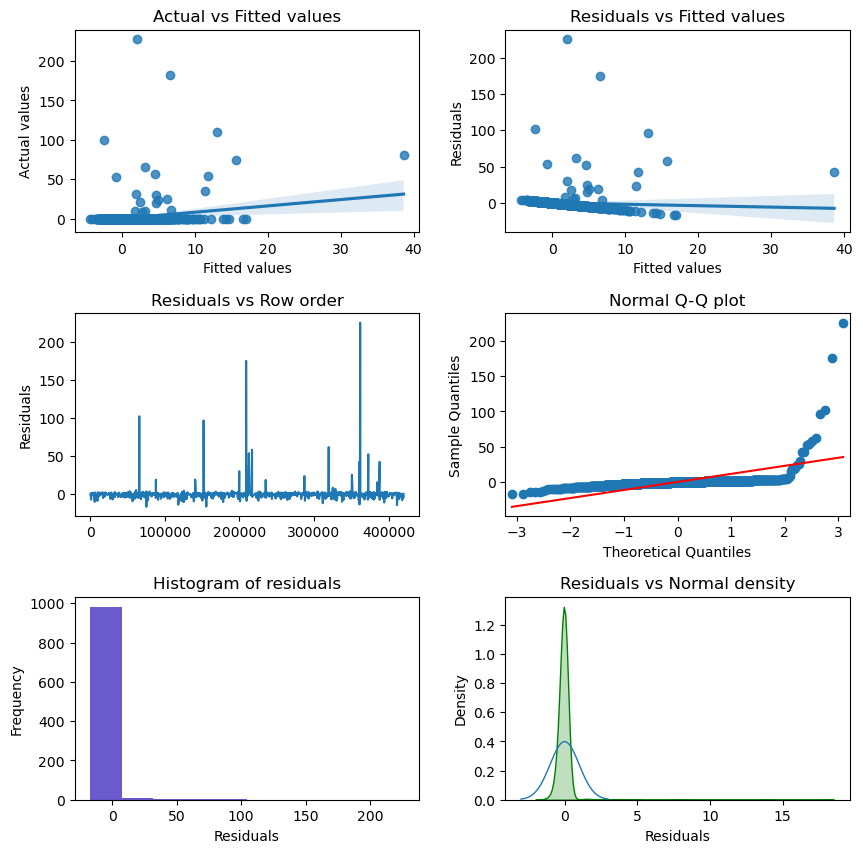

In [44]:
lr_int1.plot('dashboard')

In [45]:
pentathlon_nptb['ln_income'] = np.log(pentathlon_nptb['income']+ 1)
pentathlon_nptb['ln_education'] = np.log(pentathlon_nptb['education']+ 1)
pentathlon_nptb['ln_children'] = np.log(pentathlon_nptb['children'] + 1)
pentathlon_nptb['ln_freq_strength'] = np.log(pentathlon_nptb['freq_strength'] + 1)
pentathlon_nptb['ln_freq_water'] = np.log(pentathlon_nptb['freq_water']+ 1)
pentathlon_nptb['ln_freq_team'] = np.log(pentathlon_nptb['freq_team'] + 1)
pentathlon_nptb['ln_freq_backcountry'] = np.log(pentathlon_nptb['freq_backcountry']+ 1)
pentathlon_nptb['ln_freq_racquet'] = np.log(pentathlon_nptb['freq_racquet']+ 1)
pentathlon_nptb['ln_freq_endurance'] = np.log(pentathlon_nptb['freq_endurance']+ 1)

In [46]:
pentathlon_nptb['ln_total_os']= np.log(pentathlon_nptb['total_os'])

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [47]:
evar_linear = ['message', 'age', 'female' ,'ln_income', 'ln_education', 'ln_children', 'freq_endurance', 'freq_strength', 'freq_water', 'freq_team', 'freq_backcountry', 'freq_racquet']

In [48]:
ivar_linear=[f"{e}:message" for e in evar_linear if e != "message"]
ivar_linear

['age:message',
 'female:message',
 'ln_income:message',
 'ln_education:message',
 'ln_children:message',
 'freq_endurance:message',
 'freq_strength:message',
 'freq_water:message',
 'freq_team:message',
 'freq_backcountry:message',
 'freq_racquet:message']

In [49]:
pentathlon_nptb_yes = pentathlon_nptb.query("(buyer == 'yes') & (training == 1)")

In [50]:
lr_int2 = rsm.model.regress(
    data={"pentathlon": pentathlon_nptb_yes.query("training == 1")},
    rvar="ln_total_os",
    evar= evar_linear,
)
lr_int2.summary()

Linear regression (OLS)
Data                 : pentathlon
Response variable    : ln_total_os
Explanatory variables: message, age, female, ln_income, ln_education, ln_children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Null hyp.: the effect of x on ln_total_os is zero
Alt. hyp.: the effect of x on ln_total_os is not zero

                    coefficient  std.error  t.value p.value     
Intercept                -0.835      0.361   -2.313   0.021    *
message[control]         -0.230      0.030   -7.678  < .001  ***
message[endurance]       -0.107      0.029   -3.715  < .001  ***
message[racquet]         -0.082      0.030   -2.761   0.006   **
message[strength]        -0.125      0.029   -4.306  < .001  ***
message[team]            -0.084      0.029   -2.887   0.004   **
message[water]            0.006      0.029    0.201   0.841     
age[30 to 44]             0.080      0.028    2.808   0.005   **
age[45 to 59]             0.087      0.029    3.0

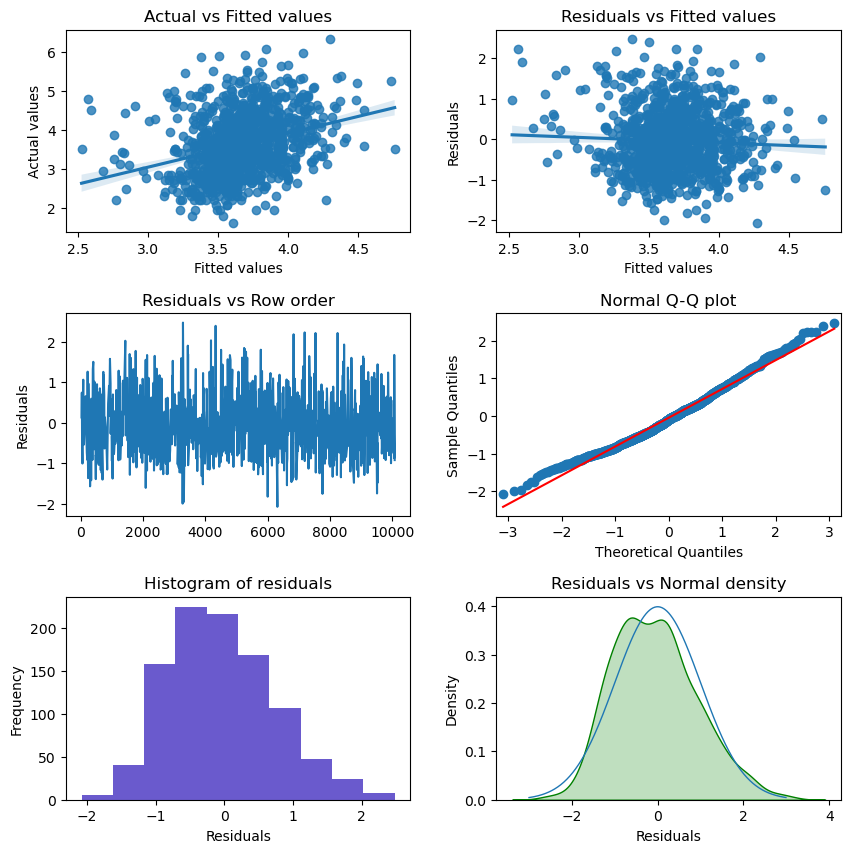

In [51]:
lr_int2.plot('dashboard')

In [52]:
nn1 = rsm.model.mlp(
    data={"pentathlon_nptb_yes": pentathlon_nptb_yes.query("training == 1")},
    rvar="ln_total_os",
    evar=evar_linear,
    hidden_layer_sizes=(1,),
    mod_type="regression"
)

nn1.summary()

Multi-layer Perceptron (NN)
Data                 : pentathlon_nptb_yes
Response variable    : ln_total_os
Explanatory variables: message, age, female, ln_income, ln_education, ln_children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Model type           : regression
Nr. of features      : (12, 19)
Nr. of weights       : 22
Nr. of observations  : 10,080
Hidden_layer_sizes   : (1,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 1000000
random_state         : 1234
Model fit            :
      n     r2    mse    mae
  10080  0.119  0.881  0.758

Raw data             :
    message      age female  ln_income  ln_education  ln_children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet
  endurance 45 to 59     no  11.082158      3.970292     0.405465               3              0           0        

In [53]:
from sklearn.model_selection import GridSearchCV

hls = [(5,5),(5,3),(4,2),(4,2,2),(5,),(2,2,4,3)]

param_grid = {'hidden_layer_sizes': hls}
scoring = {'r2': 'r2',
                       'mse': 'neg_mean_squared_error',
           }

nn1_cv = GridSearchCV(
     nn1.fitted, param_grid, scoring=scoring, cv=5, n_jobs = 4, refit = 'r2', verbose = 5
 )

nn1.data_onehot.mean().round(3)
nn1_cv.fit(nn1.data_onehot, nn1.data.ln_total_os)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=MLPRegressor(activation='tanh', hidden_layer_sizes=(1,),
                                    max_iter=1000000, random_state=1234,
                                    solver='lbfgs'),
             n_jobs=4,
             param_grid={'hidden_layer_sizes': [(5, 5), (5, 3), (4, 2),
                                                (4, 2, 2), (5,),
                                                (2, 2, 4, 3)]},
             refit='r2', scoring={'mse': 'neg_mean_squared_error', 'r2': 'r2'},
             verbose=5)

In [54]:
nn1_cv.best_params_

{'hidden_layer_sizes': (5,)}

In [55]:
nn2 = rsm.model.mlp(
    data={"pentathlon_nptb_yes": pentathlon_nptb_yes.query("training == 1")},
    rvar="ln_total_os",
    evar=evar_linear,
    hidden_layer_sizes=(5,),
    mod_type="regression"
)

nn2.summary()

Multi-layer Perceptron (NN)
Data                 : pentathlon_nptb_yes
Response variable    : ln_total_os
Explanatory variables: message, age, female, ln_income, ln_education, ln_children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Model type           : regression
Nr. of features      : (12, 19)
Nr. of weights       : 106
Nr. of observations  : 10,080
Hidden_layer_sizes   : (5,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 1000000
random_state         : 1234
Model fit            :
      n     r2    mse    mae
  10080  0.165  0.835  0.734

Raw data             :
    message      age female  ln_income  ln_education  ln_children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet
  endurance 45 to 59     no  11.082158      3.970292     0.405465               3              0           0       

In [56]:
profit_margin = 0.4

In [57]:
pentathlon_nptb["order_size_control"] = np.exp(nn2.predict(pentathlon_nptb.assign(message="control"))["prediction"])
pentathlon_nptb["order_size_team"] = np.exp(nn2.predict(pentathlon_nptb.assign(message="team"))["prediction"])
pentathlon_nptb["order_size_racquet"] = np.exp(nn2.predict(pentathlon_nptb.assign(message="racquet"))["prediction"])
pentathlon_nptb["order_size_backcountry"] = np.exp(nn2.predict(pentathlon_nptb.assign(message="backcountry"))["prediction"])
pentathlon_nptb["order_size_water"] = np.exp(nn2.predict(pentathlon_nptb.assign(message="water"))["prediction"])
pentathlon_nptb["order_size_strength"] = np.exp(nn2.predict(pentathlon_nptb.assign(message="strength"))["prediction"])
pentathlon_nptb["order_size_endurance"] = np.exp(nn2.predict(pentathlon_nptb.assign(message="endurance"))["prediction"])

In [58]:
pentathlon_nptb['ep_control'] = pentathlon_nptb.order_size_control * profit_margin * pentathlon_nptb.p_control_i
pentathlon_nptb['ep_team'] = pentathlon_nptb.order_size_team * profit_margin * pentathlon_nptb.p_team_i
pentathlon_nptb['ep_racquet'] = pentathlon_nptb.order_size_racquet * profit_margin * pentathlon_nptb.p_racquet_i
pentathlon_nptb['ep_backcountry'] = pentathlon_nptb.order_size_backcountry * profit_margin * pentathlon_nptb.p_backcountry_i
pentathlon_nptb['ep_water'] =  pentathlon_nptb.order_size_water * profit_margin * pentathlon_nptb.p_water_i
pentathlon_nptb['ep_strength'] = pentathlon_nptb.order_size_strength * profit_margin * pentathlon_nptb.p_strength_i
pentathlon_nptb['ep_endurance'] = pentathlon_nptb.order_size_endurance * profit_margin * pentathlon_nptb.p_endurance_i

In [59]:
ordersize_columns = ['ep_control', 'ep_team', 'ep_racquet', 'ep_backcountry', 'ep_water', 'ep_strength', 'ep_endurance']

# Identify the message with the highest probability for each customer
pentathlon_nptb['most_profitable_lr'] = pentathlon_nptb[ordersize_columns].idxmax(axis=1)

# clean up the column names to show just the message types
pentathlon_nptb['most_profitable_lr'] = pentathlon_nptb['most_profitable_lr'].str.replace('ep_', '')

pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,order_size_strength,order_size_endurance,ep_control,ep_team,ep_racquet,ep_backcountry,ep_water,ep_strength,ep_endurance,most_profitable_lr
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,20.316576,20.580317,0.096873,0.099500,0.119552,0.093262,0.106739,0.125573,0.129099,endurance
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,28.921345,29.474647,0.052602,0.075422,0.069234,0.067187,0.061145,0.063335,0.070900,team
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,39.398018,41.444990,0.138193,0.200671,0.146534,0.187287,0.173478,0.147240,0.230166,endurance
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,28.155591,28.500040,0.025157,0.025972,0.023847,0.027116,0.027977,0.024733,0.033858,endurance
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,34.404211,46.587358,0.189036,0.217943,0.187731,0.233467,0.238127,0.157748,0.366636,endurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,>= 60,yes,40000,26,0.6,0,...,28.230263,28.595630,0.022009,0.027884,0.030189,0.022673,0.029894,0.023590,0.036797,endurance
599996,U3462900,no,0,team,< 30,no,55000,32,0.9,3,...,28.925873,29.479536,0.079509,0.113942,0.097604,0.095353,0.071601,0.093915,0.091159,team
599997,U3462902,no,0,team,< 30,yes,55000,32,0.9,0,...,21.655354,22.262358,0.072545,0.092373,0.099799,0.093205,0.078707,0.085077,0.101026,endurance
599998,U3462916,no,0,team,< 30,no,50000,35,0.6,2,...,28.569584,29.750844,0.073334,0.081749,0.087182,0.087673,0.065569,0.083243,0.082952,backcountry


In [60]:
profit_crosstab = pd.crosstab(index=pentathlon_nptb.query('training == 0')['most_profitable_lr'], columns='count')

# Calculate the percentage of customers for each message
profit_crosstab['percentage_profit_lr'] = ((profit_crosstab['count'] / profit_crosstab['count'].sum()))*100

profit_crosstab

col_0,count,percentage_profit_lr
most_profitable_lr,,
backcountry,25255,14.030556
endurance,89467,49.703889
racquet,19769,10.982778
strength,16029,8.905000
team,15162,8.423333
water,14318,7.954444


In [61]:
pentathlon_nptb['ep_max_lr'] = pentathlon_nptb[ordersize_columns].max(axis=1)

profit_logit = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_max_lr"].agg("mean") 
print(f"Expected profit from offer customization: ${profit_logit:,.2f}")

Expected profit from offer customization: $0.53


In [62]:
(
    pentathlon_nptb.loc[pentathlon_nptb.training == 0, ['ep_control', 'ep_team', 'ep_racquet', 'ep_backcountry', 'ep_water', 'ep_strength', 'ep_endurance']
]
    .agg("mean")
    .sort_values(ascending=False)
    .apply(rsm.format_nr, sym="$", dec=2)
)

ep_endurance      $0.47
ep_water          $0.46
ep_strength       $0.44
ep_backcountry    $0.43
ep_team            $0.4
ep_racquet        $0.39
ep_control        $0.32
dtype: object

In [63]:
np.random.seed(42)

messages = ['control', 'team', 'racquet', 'backcountry', 'water', 'strength', 'endurance']

probability_per_message = 1 / len(messages)

assigned_message = np.random.choice(messages, size=len(pentathlon_nptb), p=[probability_per_message] * len(messages))

pentathlon_nptb['assigned_message'] = assigned_message

average_profits = {}

for message in messages:

    assigned_users = pentathlon_nptb[pentathlon_nptb['assigned_message'] == message]
    

    ep_column = f'ep_{message}' if message != 'no_message' else 'ep_no_message'

    assigned_users_profit = assigned_users[ep_column]
    

    average_profits[message] = assigned_users_profit.mean()


for message, avg_profit in average_profits.items():
    print(f"The average expected profit for users assigned to '{message}' is: ${avg_profit:,.2f}")
    

random_profit = np.mean(list(average_profits.values()))
print(f"The overall average expected profit per user is: ${random_profit:,.2f}")

The average expected profit for users assigned to 'control' is: $0.31
The average expected profit for users assigned to 'team' is: $0.40
The average expected profit for users assigned to 'racquet' is: $0.39
The average expected profit for users assigned to 'backcountry' is: $0.43
The average expected profit for users assigned to 'water' is: $0.46
The average expected profit for users assigned to 'strength' is: $0.44
The average expected profit for users assigned to 'endurance' is: $0.46
The overall average expected profit per user is: $0.41


In [64]:
# Assuming pentathlon_nptb is your DataFrame with all the expected profits for each message and no message
all_customer = 5000000

total_customized_profit = profit_logit * all_customer
# 1. Same messages
average_profits = pentathlon_nptb[['ep_control', 'ep_endurance', 'ep_racquet', 'ep_strength', 'ep_team', 'ep_water']].mean()
best_message_profit = average_profits.max()
total_best_message_profit = best_message_profit * all_customer

# 2. Random Message Assignment Approach
total_random_profit = random_profit * all_customer

# 3. No Message (Control) Approach
total_no_message_profit = pentathlon_nptb['ep_control'].sum()

# Now calculate the improvement in percent and in total Euros
improvement_customized_vs_best = (total_customized_profit - total_best_message_profit) / total_best_message_profit * 100
improvement_customized_vs_random = (total_customized_profit - total_random_profit) / total_random_profit * 100
improvement_customized_vs_no_message = (total_customized_profit - total_no_message_profit) / total_no_message_profit * 100

improvement_euros_customized_vs_best = total_customized_profit - total_best_message_profit
improvement_euros_customized_vs_random = total_customized_profit - total_random_profit
improvement_euros_customized_vs_no_message = total_customized_profit - total_no_message_profit

# Print out the results
print(f"Improvement over best message approach: {improvement_customized_vs_best:,.2f}% and {improvement_euros_customized_vs_best:,.2f} Euros")
print(f"Improvement over random message approach: {improvement_customized_vs_random:,.2f}% and {improvement_euros_customized_vs_random:,.2f} Euros")
print(f"Improvement over no message approach: {improvement_customized_vs_no_message:,.2f}% and {improvement_euros_customized_vs_no_message:,.2f} Euros")

Improvement over best message approach: 16.03% and 369,362.29 Euros
Improvement over random message approach: 29.57% and 610,163.76 Euros
Improvement over no message approach: 1,303.66% and 2,483,444.82 Euros


Neural Network Model

In [65]:
evar_nn = ['message','age', 'female', 'income', 
        'education', 'children','freq_endurance',
        'freq_strength', 'freq_water', 'freq_team',
        'freq_backcountry', 'freq_racquet']

In [66]:
nn1 = rsm.model.mlp(
    data = {"pentathlon_nptb_nn": training_data},
    rvar = "buyer", lev = "yes",
    evar = evar_nn,
    hidden_layer_sizes = (1,),
    mod_type = "classification"
)

nn1.summary()

Multi-layer Perceptron (NN)
Data                 : pentathlon_nptb_nn
Response variable    : buyer
Level                : yes
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Model type           : classification
Nr. of features      : (12, 19)
Nr. of weights       : 22
Nr. of observations  : 420,000
Hidden_layer_sizes   : (1,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 1000000
random_state         : 1234
AUC                  : 0.884

Raw data             :
  message age female  income  education  children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet
     team   2     no   55000         19       0.8               0              4           0          4                 0             1
endurance   3    yes   45000    

In [67]:
## GridSearchCV

from sklearn.model_selection import GridSearchCV

hls = [(10,5),(10,10),(20,20),(15,10,5),(5,5,5,),(2,2,4,3)]

param_grid = {'hidden_layer_sizes': hls}
scoring = {'AUC': 'roc_auc'}

nn1_cv = GridSearchCV(
    nn1.fitted, param_grid, scoring=scoring, cv=5, n_jobs = 4, refit = 'AUC', verbose = 5
)

nn1.data_onehot.mean().round(3)
nn1_cv.fit(nn1.data_onehot, nn1.data.buyer)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='tanh', hidden_layer_sizes=(1,),
                                     max_iter=1000000, random_state=1234,
                                     solver='lbfgs'),
             n_jobs=4,
             param_grid={'hidden_layer_sizes': [(10, 5), (10, 10), (20, 20),
                                                (15, 10, 5), (5, 5, 5),
                                                (2, 2, 4, 3)]},
             refit='AUC', scoring={'AUC': 'roc_auc'}, verbose=5)

In [68]:
nn1_cv.best_params_

{'hidden_layer_sizes': (5, 5, 5)}

In [69]:
nn2 = rsm.model.mlp(
    data = {"pentathlon_nptb_nn": training_data},
    rvar = "buyer", lev = "yes",
    evar = evar_nn,
    hidden_layer_sizes = (2,2,4,3),
    mod_type = "classification"
)

nn2.summary()

Multi-layer Perceptron (NN)
Data                 : pentathlon_nptb_nn
Response variable    : buyer
Level                : yes
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Model type           : classification
Nr. of features      : (12, 19)
Nr. of weights       : 77
Nr. of observations  : 420,000
Hidden_layer_sizes   : (2, 2, 4, 3)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 1000000
random_state         : 1234
AUC                  : 0.885

Raw data             :
  message age female  income  education  children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet
     team   2     no   55000         19       0.8               0              4           0          4                 0             1
endurance   3    yes   4

In [70]:
# Ensure the age variable is encoded consistently
pentathlon_nptb['age'] = pentathlon_nptb['age'].map(age_mapping).astype(float)

# Predict using the neural network model
pentathlon_nptb['pred_nn'] = nn2.predict(pentathlon_nptb)['prediction']

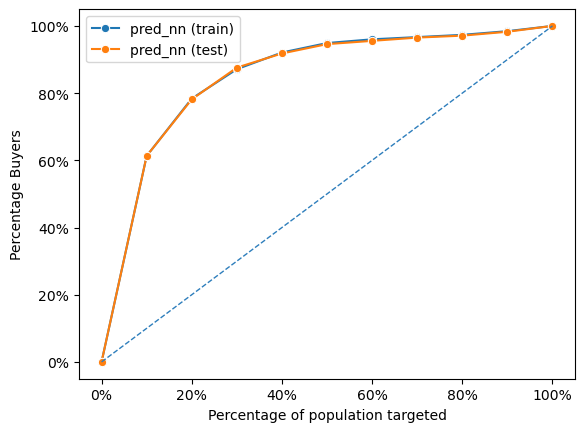

In [71]:
dct = {"train": pentathlon_nptb[pentathlon_nptb['training'] == 1], "test": pentathlon_nptb[pentathlon_nptb['training'] == 0]}

fig2 = rsm.gains_plot(dct, "buyer", "yes", "pred_nn")

In [72]:
pentathlon_nptb["p_endurance_nn"] = nn2.predict(pentathlon_nptb.assign(message="endurance"))["prediction"]
pentathlon_nptb["p_strength_nn"] = nn2.predict(pentathlon_nptb.assign(message="strength"))["prediction"]
pentathlon_nptb["p_water_nn"] = nn2.predict(pentathlon_nptb.assign(message="water"))["prediction"]
pentathlon_nptb["p_team_nn"] = nn2.predict(pentathlon_nptb.assign(message="team"))["prediction"]
pentathlon_nptb["p_backcountry_nn"] = nn2.predict(pentathlon_nptb.assign(message="backcountry"))["prediction"]
pentathlon_nptb["p_racquet_nn"] = nn2.predict(pentathlon_nptb.assign(message="racquet"))["prediction"]
pentathlon_nptb["p_control_nn"] = nn2.predict(pentathlon_nptb.assign(message="control"))["prediction"]
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,ep_max_lr,assigned_message,pred_nn,p_endurance_nn,p_strength_nn,p_water_nn,p_team_nn,p_backcountry_nn,p_racquet_nn,p_control_nn
0,U1,no,0,team,2.0,no,55000,19,0.8,0,...,0.129099,racquet,0.002052,0.002279,0.002177,0.002011,0.002052,0.001931,0.001982,0.002139
1,U3,no,0,backcountry,3.0,no,35000,22,1.0,0,...,0.075422,endurance,0.001859,0.001872,0.001871,0.001865,0.001866,0.001859,0.001858,0.001809
2,U13,no,0,endurance,3.0,yes,45000,33,0.7,0,...,0.230166,strength,0.002136,0.002136,0.002114,0.002041,0.002110,0.001974,0.002046,0.002087
3,U20,no,0,water,3.0,yes,25000,24,0.2,0,...,0.033858,water,0.001793,0.001798,0.001797,0.001793,0.001792,0.001791,0.001790,0.001787
4,U25,no,0,racquet,4.0,yes,65000,32,1.1,1,...,0.366636,team,0.007872,0.010402,0.009790,0.008602,0.008467,0.008058,0.007872,0.006962


In [73]:
repl_nn = {"p_endurance_nn": "Endurance", "p_strength_nn": "Strength", "p_water_nn": "Water", "p_team_nn": "Team", "p_backcountry_nn": "Backcountry", "p_racquet_nn": "Racquet", "p_control_nn": "Control"}

pentathlon_nptb["to_offer_nn"] = pentathlon_nptb[["p_endurance_nn", "p_strength_nn", "p_water_nn", "p_team_nn", "p_backcountry_nn", "p_racquet_nn", "p_control_nn"]].idxmax(axis=1).map(repl_nn)
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,assigned_message,pred_nn,p_endurance_nn,p_strength_nn,p_water_nn,p_team_nn,p_backcountry_nn,p_racquet_nn,p_control_nn,to_offer_nn
0,U1,no,0,team,2.0,no,55000,19,0.8,0,...,racquet,0.002052,0.002279,0.002177,0.002011,0.002052,0.001931,0.001982,0.002139,Endurance
1,U3,no,0,backcountry,3.0,no,35000,22,1.0,0,...,endurance,0.001859,0.001872,0.001871,0.001865,0.001866,0.001859,0.001858,0.001809,Endurance
2,U13,no,0,endurance,3.0,yes,45000,33,0.7,0,...,strength,0.002136,0.002136,0.002114,0.002041,0.002110,0.001974,0.002046,0.002087,Endurance
3,U20,no,0,water,3.0,yes,25000,24,0.2,0,...,water,0.001793,0.001798,0.001797,0.001793,0.001792,0.001791,0.001790,0.001787,Endurance
4,U25,no,0,racquet,4.0,yes,65000,32,1.1,1,...,team,0.007872,0.010402,0.009790,0.008602,0.008467,0.008058,0.007872,0.006962,Endurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,4.0,yes,40000,26,0.6,0,...,water,0.001821,0.001827,0.001825,0.001821,0.001821,0.001818,0.001819,0.001816,Endurance
599996,U3462900,no,0,team,1.0,no,55000,32,0.9,3,...,backcountry,0.004776,0.005384,0.005175,0.004714,0.004776,0.004452,0.004501,0.004259,Endurance
599997,U3462902,no,0,team,1.0,yes,55000,32,0.9,0,...,water,0.006986,0.008467,0.007994,0.007064,0.006986,0.006627,0.006511,0.005825,Endurance
599998,U3462916,no,0,team,1.0,no,50000,35,0.6,2,...,endurance,0.003638,0.003861,0.003767,0.003524,0.003638,0.003352,0.003466,0.003447,Endurance


In [74]:
#percentage of each offer
pd.crosstab(index=pentathlon_nptb[pentathlon_nptb.training == 0].to_offer_nn, columns="count", normalize='columns').apply(lambda x: rsm.format_nr(x * 100))

col_0,count
to_offer_nn,
Control,6.33
Endurance,90.59
Strength,0.61
Team,2.47


In [75]:
pentathlon_nptb['ep_control_nn'] = pentathlon_nptb.order_size_control * profit_margin * pentathlon_nptb.p_control_nn
pentathlon_nptb['ep_team_nn'] = pentathlon_nptb.order_size_team * profit_margin * pentathlon_nptb.p_team_nn
pentathlon_nptb['ep_racquet_nn'] = pentathlon_nptb.order_size_racquet * profit_margin * pentathlon_nptb.p_racquet_nn
pentathlon_nptb['ep_backcountry_nn'] = pentathlon_nptb.order_size_backcountry * profit_margin * pentathlon_nptb.p_backcountry_nn
pentathlon_nptb['ep_water_nn'] =  pentathlon_nptb.order_size_water * profit_margin * pentathlon_nptb.p_water_nn
pentathlon_nptb['ep_strength_nn'] = pentathlon_nptb.order_size_strength * profit_margin * pentathlon_nptb.p_strength_nn
pentathlon_nptb['ep_endurance_nn'] = pentathlon_nptb.order_size_endurance * profit_margin * pentathlon_nptb.p_endurance_nn

In [76]:
ordersize_columns = ['ep_control_nn', 'ep_team_nn', 'ep_racquet_nn', 'ep_backcountry_nn', 'ep_water_nn', 'ep_strength_nn', 'ep_endurance_nn']

# Identify the message with the highest probability for each customer
pentathlon_nptb['most_profitable_nn'] = pentathlon_nptb[ordersize_columns].idxmax(axis=1)

# clean up the column names to show just the message types
pentathlon_nptb['most_profitable_nn'] = pentathlon_nptb['most_profitable_nn'].str.extract(r'p_(.*?)_nn')

pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,p_control_nn,to_offer_nn,ep_control_nn,ep_team_nn,ep_racquet_nn,ep_backcountry_nn,ep_water_nn,ep_strength_nn,ep_endurance_nn,most_profitable_nn
0,U1,no,0,team,2.0,no,55000,19,0.8,0,...,0.002139,Endurance,0.017233,0.017005,0.016342,0.016177,0.017032,0.017691,0.018759,endurance
1,U3,no,0,backcountry,3.0,no,35000,22,1.0,0,...,0.001809,Endurance,0.020667,0.026658,0.021964,0.022485,0.022888,0.021643,0.022075,team
2,U13,no,0,endurance,3.0,yes,45000,33,0.7,0,...,0.002087,Endurance,0.031563,0.044408,0.034108,0.034500,0.036576,0.033316,0.035402,team
3,U20,no,0,water,3.0,yes,25000,24,0.2,0,...,0.001787,Endurance,0.019965,0.020562,0.020443,0.020762,0.020995,0.020235,0.020503,water
4,U25,no,0,racquet,4.0,yes,65000,32,1.1,1,...,0.006962,Endurance,0.122037,0.165954,0.122762,0.163226,0.179090,0.134730,0.193842,endurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,4.0,yes,40000,26,0.6,0,...,0.001816,Endurance,0.020334,0.026090,0.025925,0.021173,0.026658,0.020609,0.020897,water
599996,U3462900,no,0,team,1.0,no,55000,32,0.9,3,...,0.004259,Endurance,0.048655,0.070738,0.053201,0.053847,0.057881,0.059881,0.063483,team
599997,U3462902,no,0,team,1.0,yes,55000,32,0.9,0,...,0.005825,Endurance,0.049512,0.078462,0.072388,0.061385,0.067096,0.069248,0.075396,team
599998,U3462916,no,0,team,1.0,no,50000,35,0.6,2,...,0.003447,Endurance,0.039632,0.043762,0.041104,0.041024,0.043834,0.043049,0.045952,endurance


In [77]:
profit_crosstab = pd.crosstab(index=pentathlon_nptb.query('training == 0')['most_profitable_nn'], columns='count')

# Calculate the percentage of customers for each message
profit_crosstab['percentage_profit_nn'] = ((profit_crosstab['count'] / profit_crosstab['count'].sum()))*100

profit_crosstab

col_0,count,percentage_profit_nn
most_profitable_nn,,
backcountry,11385,6.325000
control,1022,0.567778
endurance,38714,21.507778
racquet,330,0.183333
strength,8744,4.857778
team,34559,19.199444
water,85246,47.358889


In [78]:
pentathlon_nptb['ep_max_nn'] = pentathlon_nptb[ordersize_columns].max(axis=1)

profit_nn = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_max_nn"].agg("mean") 
print(f"Expected profit from offer customization: ${profit_logit:,.2f}")

Expected profit from offer customization: $0.53


In [79]:
(
    pentathlon_nptb.loc[pentathlon_nptb.training == 0, ['ep_control_nn', 'ep_team_nn', 'ep_racquet_nn', 'ep_backcountry_nn', 'ep_water_nn', 'ep_strength_nn', 'ep_endurance_nn']
]
    .agg("mean")
    .sort_values(ascending=False)
    .apply(rsm.format_nr, sym="$", dec=2)
)

ep_water_nn          $0.26
ep_endurance_nn      $0.26
ep_strength_nn       $0.25
ep_backcountry_nn    $0.25
ep_team_nn           $0.23
ep_racquet_nn        $0.23
ep_control_nn        $0.18
dtype: object

In [80]:
np.random.seed(42)

messages_nn = ['control', 'team', 'racquet', 'backcountry', 'water', 'strength', 'endurance']

probability_per_message_nn = 1 / len(messages_nn)

assigned_message_nn = np.random.choice(messages_nn, size=len(pentathlon_nptb), p=[probability_per_message_nn] * len(messages_nn))

pentathlon_nptb['assigned_message_nn'] = assigned_message_nn

average_profits_nn = {}

for message_nn in messages_nn:

    assigned_users_nn = pentathlon_nptb[pentathlon_nptb['assigned_message_nn'] == message_nn]
    

    ep_column_nn = f'ep_{message_nn}' if message_nn != 'no_message' else 'ep_no_message'

    assigned_users_profit_nn = assigned_users_nn[ep_column_nn]
    

    average_profits_nn[message_nn] = assigned_users_profit_nn.mean()


for message_nn, avg_profit_nn in average_profits_nn.items():
    print(f"The average expected profit for users assigned to '{message_nn}' is: ${avg_profit_nn:,.2f}")
    

random_profit_nn = np.mean(list(average_profits_nn.values()))
print(f"The overall average expected profit per user is: ${random_profit_nn:,.2f}")

The average expected profit for users assigned to 'control' is: $0.31
The average expected profit for users assigned to 'team' is: $0.40
The average expected profit for users assigned to 'racquet' is: $0.39
The average expected profit for users assigned to 'backcountry' is: $0.43
The average expected profit for users assigned to 'water' is: $0.46
The average expected profit for users assigned to 'strength' is: $0.44
The average expected profit for users assigned to 'endurance' is: $0.46
The overall average expected profit per user is: $0.41


In [81]:
# Assuming pentathlon_nptb is your DataFrame with all the expected profits for each message and no message
all_customer = 5000000

total_customized_profit = profit_nn * all_customer
# 1. Same messages
average_profits = pentathlon_nptb[['ep_control_nn', 'ep_endurance_nn', 'ep_racquet_nn', 'ep_strength_nn', 'ep_team_nn', 'ep_water_nn']].mean()
best_message_profit = average_profits.max()
total_best_message_profit = best_message_profit * all_customer

# 2. Random Message Assignment Approach
total_random_profit = random_profit_nn * all_customer

# 3. No Message (Control) Approach
total_no_message_profit = pentathlon_nptb['ep_control_nn'].sum()

# Now calculate the improvement in percent and in total Euros
improvement_customized_vs_best = (total_customized_profit - total_best_message_profit) / total_best_message_profit * 100
improvement_customized_vs_random = (total_customized_profit - total_random_profit) / total_random_profit * 100
improvement_customized_vs_no_message = (total_customized_profit - total_no_message_profit) / total_no_message_profit * 100

improvement_euros_customized_vs_best = total_customized_profit - total_best_message_profit
improvement_euros_customized_vs_random = total_customized_profit - total_random_profit
improvement_euros_customized_vs_no_message = total_customized_profit - total_no_message_profit

# Print out the results
print(f"Improvement over best message approach: {improvement_customized_vs_best:,.2f}% and {improvement_euros_customized_vs_best:,.2f} Euros")
print(f"Improvement over random message approach: {improvement_customized_vs_random:,.2f}% and {improvement_euros_customized_vs_random:,.2f} Euros")
print(f"Improvement over no message approach: {improvement_customized_vs_no_message:,.2f}% and {improvement_euros_customized_vs_no_message:,.2f} Euros")

Improvement over best message approach: 12.33% and 158,465.61 Euros
Improvement over random message approach: -30.04% and -619,895.84 Euros
Improvement over no message approach: 1,222.72% and 1,334,723.01 Euros


Random Forest Model

In [82]:
import pandas as pd
import pyrsm as rsm
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

In [83]:
evar_rf = ['message','age', 'female', 'income', 
        'education', 'children','freq_endurance',
        'freq_strength', 'freq_water', 'freq_team',
        'freq_backcountry', 'freq_racquet'] 

In [84]:
rf_model = rsm.model.rforest(
    data={"pentathlon_nptb_rf": training_data},
    rvar="buyer",
    evar = evar_rf,
    lev="yes"
)
rf_model.summary()

Random Forest
Data                 : pentathlon_nptb_rf
Response variable    : buyer
Level                : yes
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
OOB                  : True
Model type           : classification
Nr. of features      : (12, 21)
Nr. of observations  : 420,000
max_features         : sqrt (4)
n_estimators         : 100
min_samples_leaf     : 1
max_samples          : 1.0
random_state         : 1234
AUC                  : 0.824

Estimation data      :
 income  education  children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet  message_backcountry  message_control  message_endurance  message_racquet  message_strength  message_team  message_water  age_1  age_2  age_3  age_4  female_no
  55000         19       0.8               0              4           0          4                 0             1                Fal

In [85]:
rf1_model = rsm.model.rforest(
    data={"pentathlon_nptb_rf": training_data},
    rvar="buyer",
    evar=evar_rf,
    lev="yes",
    n_estimators = 500,
    max_features = 'sqrt',
    min_samples_leaf=4,
    min_samples_split=4,
)

rf1_model.summary()

Random Forest
Data                 : pentathlon_nptb_rf
Response variable    : buyer
Level                : yes
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
OOB                  : True
Model type           : classification
Nr. of features      : (12, 21)
Nr. of observations  : 420,000
max_features         : sqrt (4)
n_estimators         : 500
min_samples_leaf     : 4
max_samples          : 1.0
random_state         : 1234
AUC                  : 0.876
Extra arguments      : min_samples_split=4

Estimation data      :
 income  education  children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet  message_backcountry  message_control  message_endurance  message_racquet  message_strength  message_team  message_water  age_1  age_2  age_3  age_4  female_no
  55000         19       0.8               0              4           0          4        

In [86]:
# Ensure the age variable is encoded consistently
pentathlon_nptb['age'] = pentathlon_nptb['age'].map(age_mapping)

# Predict using the random forest model
pentathlon_nptb['pred_rf'] = rf1_model.predict(pentathlon_nptb)['prediction']

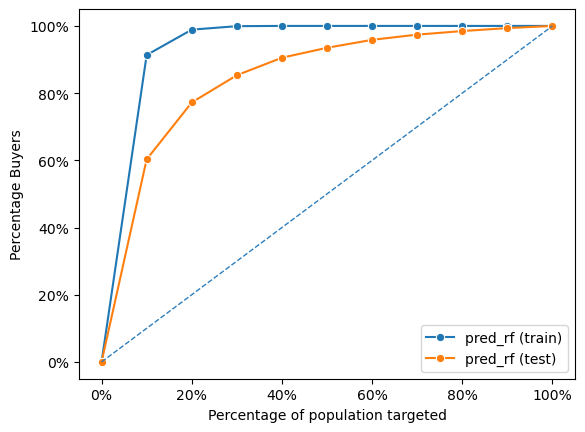

In [87]:
dct = {"train": pentathlon_nptb[pentathlon_nptb['training'] == 1], "test": pentathlon_nptb[pentathlon_nptb['training'] == 0]}

fig3 = rsm.gains_plot(dct, "buyer", "yes", "pred_rf")

In [88]:
pentathlon_nptb["p_control_rf"] = rf1_model.predict(pentathlon_nptb.assign(message="control"))['prediction']
pentathlon_nptb["p_team_rf"] = rf1_model.predict(pentathlon_nptb.assign(message="team"))['prediction']
pentathlon_nptb["p_racquet_rf"] = rf1_model.predict(pentathlon_nptb.assign(message="racquet"))['prediction']
pentathlon_nptb["p_backcountry_rf"] = rf1_model.predict(pentathlon_nptb.assign(message="backcountry"))['prediction']
pentathlon_nptb["p_water_rf"] = rf1_model.predict(pentathlon_nptb.assign(message="water"))['prediction']
pentathlon_nptb["p_strength_rf"] = rf1_model.predict(pentathlon_nptb.assign(message="strength"))['prediction']
pentathlon_nptb["p_endurance_rf"] = rf1_model.predict(pentathlon_nptb.assign(message="endurance"))['prediction']

In [89]:
repl_rf = {"p_endurance_rf": "Endurance", "p_strength_rf": "Strength", "p_water_rf": "Water", "p_team_rf": "Team", "p_backcountry_rf": "Backcountry", "p_racquet_rf": "Racquet", "p_control_rf": "Control"}

pentathlon_nptb["to_offer_rf"] = pentathlon_nptb[["p_endurance_rf", "p_strength_rf", "p_water_rf", "p_team_rf", "p_backcountry_rf", "p_racquet_rf", "p_control_rf"]].idxmax(axis=1).map(repl_rf)
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,assigned_message_nn,pred_rf,p_control_rf,p_team_rf,p_racquet_rf,p_backcountry_rf,p_water_rf,p_strength_rf,p_endurance_rf,to_offer_rf
0,U1,no,0,team,NaN,no,55000,19,0.8,0,...,racquet,0.005816,0.005526,0.005816,0.008017,0.008963,0.012199,0.008057,0.018249,Endurance
1,U3,no,0,backcountry,NaN,no,35000,22,1.0,0,...,endurance,0.000611,0.000023,0.000869,0.000108,0.000611,0.000766,0.001213,0.000990,Strength
2,U13,no,0,endurance,NaN,yes,45000,33,0.7,0,...,strength,0.011035,0.005757,0.005433,0.009295,0.002853,0.001689,0.003846,0.011035,Endurance
3,U20,no,0,water,NaN,yes,25000,24,0.2,0,...,water,0.000148,0.001113,0.002652,0.000157,0.000393,0.000148,0.000444,0.020419,Endurance
4,U25,no,0,racquet,NaN,yes,65000,32,1.1,1,...,team,0.026094,0.014426,0.020854,0.026094,0.022285,0.011683,0.018583,0.011494,Racquet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,NaN,yes,40000,26,0.6,0,...,water,0.000106,0.000151,0.000186,0.000051,0.005868,0.000106,0.000006,0.000612,Backcountry
599996,U3462900,no,0,team,NaN,no,55000,32,0.9,3,...,backcountry,0.011119,0.013522,0.011119,0.013423,0.012994,0.013733,0.020151,0.009480,Strength
599997,U3462902,no,0,team,NaN,yes,55000,32,0.9,0,...,water,0.015344,0.010092,0.015344,0.010836,0.012059,0.015178,0.019891,0.020177,Endurance
599998,U3462916,no,0,team,NaN,no,50000,35,0.6,2,...,endurance,0.016038,0.008961,0.016038,0.006234,0.007234,0.007174,0.013303,0.006391,Team


In [90]:
#percentage of each offer
pd.crosstab(index=pentathlon_nptb[pentathlon_nptb.training == 0].to_offer_rf, columns="count", normalize='columns').apply(lambda x: rsm.format_nr(x * 100))

col_0,count
to_offer_rf,
Backcountry,10.4
Control,8.3
Endurance,27.61
Racquet,10.36
Strength,19.98
Team,11.23
Water,12.13


In [91]:
pentathlon_nptb['ep_control_rf'] = pentathlon_nptb.order_size_control * profit_margin * pentathlon_nptb.p_control_rf
pentathlon_nptb['ep_team_rf'] = pentathlon_nptb.order_size_team * profit_margin * pentathlon_nptb.p_team_rf
pentathlon_nptb['ep_racquet_rf'] = pentathlon_nptb.order_size_racquet * profit_margin * pentathlon_nptb.p_racquet_rf
pentathlon_nptb['ep_backcountry_rf'] = pentathlon_nptb.order_size_backcountry * profit_margin * pentathlon_nptb.p_backcountry_rf
pentathlon_nptb['ep_water_rf'] =  pentathlon_nptb.order_size_water * profit_margin * pentathlon_nptb.p_water_rf
pentathlon_nptb['ep_strength_rf'] = pentathlon_nptb.order_size_strength * profit_margin * pentathlon_nptb.p_strength_rf
pentathlon_nptb['ep_endurance_rf'] = pentathlon_nptb.order_size_endurance * profit_margin * pentathlon_nptb.p_endurance_rf

In [92]:
ordersize_columns = ['ep_control_rf', 'ep_team_rf', 'ep_racquet_rf', 'ep_backcountry_rf', 'ep_water_rf', 'ep_strength_rf', 'ep_endurance_rf']

# Identify the message with the highest probability for each customer
pentathlon_nptb['most_profitable_rf'] = pentathlon_nptb[ordersize_columns].idxmax(axis=1)

# clean up the column names to show just the message types
pentathlon_nptb['most_profitable_rf'] = pentathlon_nptb['most_profitable_rf'].str.extract(r'p_(.*?)_rf')

pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,p_endurance_rf,to_offer_rf,ep_control_rf,ep_team_rf,ep_racquet_rf,ep_backcountry_rf,ep_water_rf,ep_strength_rf,ep_endurance_rf,most_profitable_rf
0,U1,no,0,team,NaN,no,55000,19,0.8,0,...,0.018249,Endurance,0.044528,0.048195,0.066110,0.075098,0.103314,0.065479,0.150228,endurance
1,U3,no,0,backcountry,NaN,no,35000,22,1.0,0,...,0.000990,Strength,0.000262,0.012415,0.001276,0.007389,0.009400,0.014036,0.011672,strength
2,U13,no,0,endurance,NaN,yes,45000,33,0.7,0,...,0.011035,Endurance,0.087053,0.114361,0.154969,0.049850,0.030266,0.060608,0.182937,endurance
3,U20,no,0,water,NaN,yes,25000,24,0.2,0,...,0.020419,Endurance,0.012438,0.030423,0.001797,0.004553,0.001738,0.004999,0.232776,endurance
4,U25,no,0,racquet,NaN,yes,65000,32,1.1,1,...,0.011494,Racquet,0.252865,0.408753,0.406905,0.451392,0.243228,0.255738,0.214198,backcountry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,NaN,yes,40000,26,0.6,0,...,0.000612,Backcountry,0.001695,0.002663,0.000724,0.068319,0.001553,0.000063,0.007004,backcountry
599996,U3462900,no,0,team,NaN,no,55000,32,0.9,3,...,0.009480,Strength,0.154491,0.164698,0.158657,0.157163,0.168611,0.233158,0.111784,strength
599997,U3462902,no,0,team,NaN,yes,55000,32,0.9,0,...,0.020177,Endurance,0.085778,0.172329,0.120471,0.111707,0.144167,0.172301,0.179676,endurance
599998,U3462916,no,0,team,NaN,no,50000,35,0.6,2,...,0.006391,Team,0.103031,0.192918,0.073920,0.088523,0.089224,0.152019,0.076052,team


In [93]:
profit_crosstab = pd.crosstab(index=pentathlon_nptb.query('training == 0')['most_profitable_nn'], columns='count')

# Calculate the percentage of customers for each message
profit_crosstab['percentage_profit_rf'] = ((profit_crosstab['count'] / profit_crosstab['count'].sum()))*100

profit_crosstab

col_0,count,percentage_profit_rf
most_profitable_nn,,
backcountry,11385,6.325000
control,1022,0.567778
endurance,38714,21.507778
racquet,330,0.183333
strength,8744,4.857778
team,34559,19.199444
water,85246,47.358889


In [94]:
pentathlon_nptb['ep_max_rf'] = pentathlon_nptb[ordersize_columns].max(axis=1)

profit_rf = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_max_rf"].agg("mean") 
print(f"Expected profit from offer customization: ${profit_rf:,.2f}")

Expected profit from offer customization: $0.56


In [95]:
(
    pentathlon_nptb.loc[pentathlon_nptb.training == 0, ['ep_control_rf', 'ep_team_rf', 'ep_racquet_rf', 'ep_backcountry_rf', 'ep_water_rf', 'ep_strength_rf', 'ep_endurance_rf']
]
    .agg("mean")
    .sort_values(ascending=False)
    .apply(rsm.format_nr, sym="$", dec=2)
)

ep_water_rf          $0.45
ep_endurance_rf      $0.44
ep_backcountry_rf    $0.43
ep_strength_rf       $0.42
ep_team_rf           $0.41
ep_racquet_rf         $0.4
ep_control_rf        $0.33
dtype: object

In [96]:
np.random.seed(42)

messages = ['control', 'team', 'racquet', 'backcountry', 'water', 'strength', 'endurance']

probability_per_message = 1 / len(messages)

assigned_message = np.random.choice(messages, size=len(pentathlon_nptb), p=[probability_per_message] * len(messages))

pentathlon_nptb['assigned_message'] = assigned_message

average_profits = {}

for message in messages:

    assigned_users = pentathlon_nptb[pentathlon_nptb['assigned_message'] == message]
    

    ep_column = f'ep_{message}' if message != 'no_message' else 'ep_no_message'

    assigned_users_profit = assigned_users[ep_column]
    

    average_profits[message] = assigned_users_profit.mean()


for message, avg_profit in average_profits.items():
    print(f"The average expected profit for users assigned to '{message}' is: ${avg_profit:,.2f}")
    

random_profit = np.mean(list(average_profits.values()))
print(f"The overall average expected profit per user is: ${random_profit:,.2f}")

The average expected profit for users assigned to 'control' is: $0.31
The average expected profit for users assigned to 'team' is: $0.40
The average expected profit for users assigned to 'racquet' is: $0.39
The average expected profit for users assigned to 'backcountry' is: $0.43
The average expected profit for users assigned to 'water' is: $0.46
The average expected profit for users assigned to 'strength' is: $0.44
The average expected profit for users assigned to 'endurance' is: $0.46
The overall average expected profit per user is: $0.41


In [97]:
# Assuming pentathlon_nptb is your DataFrame with all the expected profits for each message and no message
all_customer = 5000000

total_customized_profit = profit_rf * all_customer
# 1. Same messages
average_profits = pentathlon_nptb[['ep_control_rf', 'ep_endurance_rf', 'ep_racquet_rf', 'ep_strength_rf', 'ep_team_rf', 'ep_water_rf']].mean()
best_message_profit = average_profits.max()
total_best_message_profit = best_message_profit * all_customer

# 2. Random Message Assignment Approach
total_random_profit = random_profit * all_customer

# 3. No Message (Control) Approach
total_no_message_profit = pentathlon_nptb['ep_control_rf'].sum()

# Now calculate the improvement in percent and in total Euros
improvement_customized_vs_best = (total_customized_profit - total_best_message_profit) / total_best_message_profit * 100
improvement_customized_vs_random = (total_customized_profit - total_random_profit) / total_random_profit * 100
improvement_customized_vs_no_message = (total_customized_profit - total_no_message_profit) / total_no_message_profit * 100

improvement_euros_customized_vs_best = total_customized_profit - total_best_message_profit
improvement_euros_customized_vs_random = total_customized_profit - total_random_profit
improvement_euros_customized_vs_no_message = total_customized_profit - total_no_message_profit

# Print out the results
print(f"Improvement over best message approach: {improvement_customized_vs_best:,.2f}% and {improvement_euros_customized_vs_best:,.2f} Euros")
print(f"Improvement over random message approach: {improvement_customized_vs_random:,.2f}% and {improvement_euros_customized_vs_random:,.2f} Euros")
print(f"Improvement over no message approach: {improvement_customized_vs_no_message:,.2f}% and {improvement_euros_customized_vs_no_message:,.2f} Euros")

Improvement over best message approach: 23.50% and 530,099.89 Euros
Improvement over random message approach: 34.99% and 722,215.58 Euros
Improvement over no message approach: 1,307.71% and 2,588,085.26 Euros


XGBoost Model

In [116]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [110]:
pentathlon_nptb_new = pd.read_parquet("data/pentathlon_nptb_new.parquet")
pentathlon_nptb_new.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,4,0,4,0,1,1.0
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,0,0,1,0,0,0.0
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,0,0,0,2,2,1.0
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,0,0,0,0,0,1.0
4,U25,no,0,racquet,60 and older,yes,65000,32,1.1,1,2,0,0,2,2,0.0


In [111]:
percentage_training_new = (len(pentathlon_nptb_new[pentathlon_nptb_new["training"] == 1]) / len(pentathlon_nptb_new)) * 100
print(f"% of Training data from the total data: {percentage_training_new:.2f}%")

percentage_test_new = (len(pentathlon_nptb_new[pentathlon_nptb_new["training"] == 0]) / len(pentathlon_nptb_new)) * 100
print(f"% of Test data from the total data: {percentage_test_new:.2f}%")

% of Training data from the total data: 70.00%
% of Test data from the total data: 30.00%


In [112]:
training_data_new = pentathlon_nptb_new[pentathlon_nptb_new["training"] == 1]
training_data_new.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,4,0,4,0,1,1.0
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,0,0,0,2,2,1.0
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,0,0,0,0,0,1.0
5,U28,no,0,strength,less than 30,yes,25000,18,0.3,0,0,0,0,0,0,1.0
8,U59,no,0,strength,60 and older,yes,65000,36,1.2,1,1,0,2,0,3,1.0


In [113]:
test_data_new = pentathlon_nptb_new[pentathlon_nptb_new["training"] == 0]
test_data_new.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,0,0,1,0,0,0.0
4,U25,no,0,racquet,60 and older,yes,65000,32,1.1,1,2,0,0,2,2,0.0
6,U30,no,0,endurance,less than 30,yes,65000,62,0.5,1,5,0,5,3,2,0.0
7,U55,no,0,strength,30 to 44,no,35000,17,1.1,0,0,0,1,0,0,0.0
15,U97,no,0,endurance,less than 30,yes,65000,40,0.7,4,6,1,1,1,1,0.0


In [114]:
X_train, y_train= training_data_new.loc[:, "message":"freq_racquet"], training_data_new.loc[:, "buyer"].map({'yes': 1, 'no': 0}).astype(int)

In [117]:
param_grid = {
     'max_depth': [3, 5, 20],
     'n_estimators': [20,50,100],
     'subsample': [0.8, 1],
     'alpha': [0, 0.5, 1],
}
model_xgb = xgb.XGBClassifier(objective='binary:logistic', seed=123,enable_categorical=True)

In [118]:
grid_search_xgb = GridSearchCV(estimator=model_xgb, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=5)
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END alpha=0, max_depth=3, n_estimators=20, subsample=0.8;, score=0.886 total time=   0.2s
[CV 2/5] END alpha=0, max_depth=3, n_estimators=20, subsample=0.8;, score=0.881 total time=   0.1s
[CV 3/5] END alpha=0, max_depth=3, n_estimators=20, subsample=0.8;, score=0.887 total time=   0.1s
[CV 4/5] END alpha=0, max_depth=3, n_estimators=20, subsample=0.8;, score=0.879 total time=   0.2s
[CV 5/5] END alpha=0, max_depth=3, n_estimators=20, subsample=0.8;, score=0.877 total time=   0.1s
[CV 1/5] END alpha=0, max_depth=3, n_estimators=20, subsample=1;, score=0.886 total time=   0.1s
[CV 2/5] END alpha=0, max_depth=3, n_estimators=20, subsample=1;, score=0.881 total time=   0.2s
[CV 3/5] END alpha=0, max_depth=3, n_estimators=20, subsample=1;, score=0.889 total time=   0.2s
[CV 4/5] END alpha=0, max_depth=3, n_estimators=20, subsample=1;, score=0.879 total time=   0.2s
[CV 5/5] END alpha=0, max_depth=3, n_estimators=20, sub

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'alpha': [0, 0.5, 1], 'max_depth': [3, 5, 20],
                         'n_estimators': [20, 50, 100], 'subsample': [0.8, 1]},
             scoring='roc_auc', verbose=5)

In [119]:
#Best parameters and best score
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Score:", grid_search_xgb.best_score_)

Best Parameters: {'alpha': 0, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1}
Best Score: 0.8868208744321386


In [120]:
model_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                              seed=123,
                              enable_categorical=True,
                              alpha=0,
                              max_depth=5,
                              n_estimators=50,
                              subsample=1)

In [121]:
model_xgb.fit(X_train, y_train)

XGBClassifier(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [124]:
# Define the feature columns used during training
feature_columns = X_train.columns.tolist()

# Convert categorical columns to 'category' type
for col in feature_columns:
    if col in pentathlon_nptb_new.columns and pentathlon_nptb_new[col].dtype.name == 'object':
        pentathlon_nptb_new[col] = pentathlon_nptb_new[col].astype('category')

# Exclude any columns not used as features during training
predictors_df = pentathlon_nptb_new[feature_columns]

# Make predictions using the trained model
pentathlon_nptb_new['pred_xgb'] = model_xgb.predict_proba(predictors_df)[:, 1]

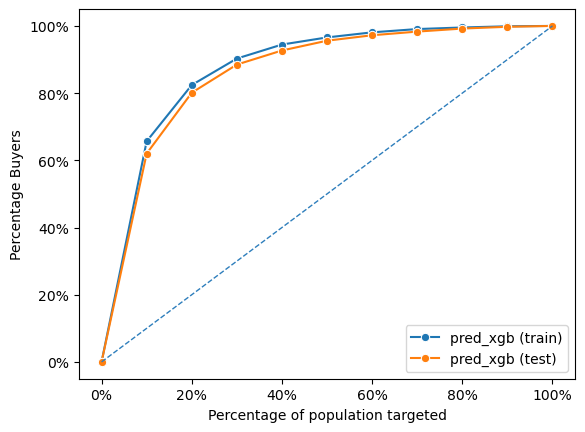

In [125]:
dct = {"train": pentathlon_nptb_new[pentathlon_nptb_new['training'] == 1], "test": pentathlon_nptb_new[pentathlon_nptb_new['training'] == 0]}

fig4 = rsm.gains_plot(dct, "buyer", "yes", "pred_xgb")

In [126]:
all_columns = training_data.columns.tolist()

# Find the index positions for 'message' and 'freq_racquet'
start_index = all_columns.index('message')
end_index = all_columns.index('freq_racquet') + 1  # Add 1 because slicing is exclusive at the end

# Slice the list to get your desired column names
feature_list = all_columns[start_index:end_index]

In [130]:
categories = pentathlon_nptb_new['message'].cat.categories  # Assuming this is correctly capturing your categories

for msg in ['control', 'team', 'racquet', 'backcountry', 'water', 'strength', 'endurance']:
    # Correctly assign 'message' for the current iteration
    temp_df = pentathlon_nptb_new[feature_list].copy()
    temp_df['message'] = pd.Categorical([msg]*len(temp_df), categories=categories)
    
    # Perform prediction
    pentathlon_nptb_new[f'p_{msg}_xgb'] = model_xgb.predict_proba(temp_df)[:, 1]

In [131]:
message_columns = ['p_control_xgb', 'p_team_xgb', 'p_racquet_xgb', 'p_backcountry_xgb', 'p_water_xgb', 'p_strength_xgb', 'p_endurance_xgb']

# Identify the message with the highest probability for each customer
pentathlon_nptb_new['best_message_xgb'] = pentathlon_nptb_new[message_columns].idxmax(axis=1)

# clean up the column names to show just the message types
pentathlon_nptb_new['best_message_xgb'] = pentathlon_nptb_new['best_message_xgb'].str.replace('p_', '')

pentathlon_nptb_new

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,training,pred_xgb,p_control_xgb,p_team_xgb,p_racquet_xgb,p_backcountry_xgb,p_water_xgb,p_strength_xgb,p_endurance_xgb,best_message_xgb
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,1.0,0.010958,0.008991,0.010958,0.011110,0.011687,0.011902,0.013931,0.013471,strength_xgb
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,0.0,0.000865,0.000762,0.000817,0.000753,0.000865,0.000908,0.000945,0.001892,endurance_xgb
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,1.0,0.006672,0.006183,0.006803,0.006500,0.006014,0.004926,0.006086,0.006672,team_xgb
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,1.0,0.000946,0.000687,0.000925,0.000722,0.001261,0.000946,0.001185,0.003497,endurance_xgb
4,U25,no,0,racquet,60 and older,yes,65000,32,1.1,1,...,0.0,0.008676,0.006803,0.007482,0.008676,0.006763,0.006440,0.006527,0.008288,racquet_xgb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,60 and older,yes,40000,26,0.6,0,...,1.0,0.001546,0.001493,0.001553,0.001570,0.001745,0.001546,0.001936,0.003280,endurance_xgb
599996,U3462900,no,0,team,less than 30,no,55000,32,0.9,3,...,0.0,0.006381,0.005663,0.006381,0.006129,0.005563,0.005071,0.007599,0.005502,strength_xgb
599997,U3462902,no,0,team,less than 30,yes,55000,32,0.9,0,...,1.0,0.006681,0.006491,0.006681,0.008168,0.006218,0.006899,0.007015,0.006825,racquet_xgb
599998,U3462916,no,0,team,less than 30,no,50000,35,0.6,2,...,0.0,0.006042,0.005245,0.006042,0.006357,0.004638,0.004568,0.006618,0.005558,strength_xgb


In [132]:
repl_xgb = {"p_endurance_xgb": "Endurance", "p_strength_xgb": "Strength", "p_water_xgb": "Water", "p_team_xgb": "Team", "p_backcountry_xgb": "Backcountry", "p_racquet_xgb": "Racquet", "p_control_xgb": "Control"}

pentathlon_nptb_new["to_offer_xgb"] = pentathlon_nptb_new[["p_endurance_xgb", "p_strength_xgb", "p_water_xgb", "p_team_xgb", "p_backcountry_xgb", "p_racquet_xgb", "p_control_xgb"]].idxmax(axis=1).map(repl_xgb)
pentathlon_nptb_new

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,pred_xgb,p_control_xgb,p_team_xgb,p_racquet_xgb,p_backcountry_xgb,p_water_xgb,p_strength_xgb,p_endurance_xgb,best_message_xgb,to_offer_xgb
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,0.010958,0.008991,0.010958,0.011110,0.011687,0.011902,0.013931,0.013471,strength_xgb,Strength
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,0.000865,0.000762,0.000817,0.000753,0.000865,0.000908,0.000945,0.001892,endurance_xgb,Endurance
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,0.006672,0.006183,0.006803,0.006500,0.006014,0.004926,0.006086,0.006672,team_xgb,Team
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,0.000946,0.000687,0.000925,0.000722,0.001261,0.000946,0.001185,0.003497,endurance_xgb,Endurance
4,U25,no,0,racquet,60 and older,yes,65000,32,1.1,1,...,0.008676,0.006803,0.007482,0.008676,0.006763,0.006440,0.006527,0.008288,racquet_xgb,Racquet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,60 and older,yes,40000,26,0.6,0,...,0.001546,0.001493,0.001553,0.001570,0.001745,0.001546,0.001936,0.003280,endurance_xgb,Endurance
599996,U3462900,no,0,team,less than 30,no,55000,32,0.9,3,...,0.006381,0.005663,0.006381,0.006129,0.005563,0.005071,0.007599,0.005502,strength_xgb,Strength
599997,U3462902,no,0,team,less than 30,yes,55000,32,0.9,0,...,0.006681,0.006491,0.006681,0.008168,0.006218,0.006899,0.007015,0.006825,racquet_xgb,Racquet
599998,U3462916,no,0,team,less than 30,no,50000,35,0.6,2,...,0.006042,0.005245,0.006042,0.006357,0.004638,0.004568,0.006618,0.005558,strength_xgb,Strength


In [134]:
#percentage of each offer
pd.crosstab(index=pentathlon_nptb_new[pentathlon_nptb_new.training == 0].to_offer_xgb, columns="count", normalize='columns').apply(lambda x: rsm.format_nr(x * 100))

col_0,count
to_offer_xgb,
Backcountry,2.23
Control,0.6
Endurance,56.47
Racquet,6.73
Strength,28.5
Team,1.77
Water,3.69


In [136]:
pentathlon_nptb_new['ep_control_xgb'] = pentathlon_nptb.order_size_control * profit_margin * pentathlon_nptb_new.p_control_xgb
pentathlon_nptb_new['ep_team_xgb'] = pentathlon_nptb.order_size_team * profit_margin * pentathlon_nptb_new.p_team_xgb
pentathlon_nptb_new['ep_racquet_xgb'] = pentathlon_nptb.order_size_racquet * profit_margin * pentathlon_nptb_new.p_racquet_xgb
pentathlon_nptb_new['ep_backcountry_xgb'] = pentathlon_nptb.order_size_backcountry * profit_margin * pentathlon_nptb_new.p_backcountry_xgb
pentathlon_nptb_new['ep_water_xgb'] =  pentathlon_nptb.order_size_water * profit_margin * pentathlon_nptb_new.p_water_xgb
pentathlon_nptb_new['ep_strength_xgb'] = pentathlon_nptb.order_size_strength * profit_margin * pentathlon_nptb_new.p_strength_xgb
pentathlon_nptb_new['ep_endurance_xgb'] = pentathlon_nptb.order_size_endurance * profit_margin * pentathlon_nptb_new.p_endurance_xgb

In [137]:
ordersize_columns = ['ep_control_xgb', 'ep_team_xgb', 'ep_racquet_xgb', 'ep_backcountry_xgb', 'ep_water_xgb', 'ep_strength_xgb', 'ep_endurance_xgb']

# Identify the message with the highest probability for each customer
pentathlon_nptb_new['most_profitable_xgb'] = pentathlon_nptb_new[ordersize_columns].idxmax(axis=1)

# clean up the column names to show just the message types
pentathlon_nptb_new['most_profitable_xgb'] = pentathlon_nptb_new['most_profitable_xgb'].str.extract(r'p_(.*?)_xgb')

pentathlon_nptb_new

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,best_message_xgb,to_offer_xgb,ep_control_xgb,ep_team_xgb,ep_racquet_xgb,ep_backcountry_xgb,ep_water_xgb,ep_strength_xgb,ep_endurance_xgb,most_profitable_xgb
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,strength_xgb,Strength,0.072453,0.090807,0.091614,0.097928,0.100798,0.113213,0.110894,strength
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,endurance_xgb,Endurance,0.008700,0.011678,0.008894,0.010460,0.011142,0.010931,0.022309,endurance
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,team_xgb,Team,0.093494,0.143196,0.108361,0.105088,0.088273,0.095907,0.110606,team
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,endurance_xgb,Endurance,0.007676,0.010615,0.008248,0.014612,0.011077,0.013343,0.039870,endurance
4,U25,no,0,racquet,60 and older,yes,65000,32,1.1,1,...,racquet_xgb,Racquet,0.119244,0.146656,0.135301,0.136993,0.134087,0.089816,0.154439,endurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,60 and older,yes,40000,26,0.6,0,...,endurance_xgb,Endurance,0.016721,0.022242,0.022381,0.020313,0.022634,0.021862,0.037517,endurance
599996,U3462900,no,0,team,less than 30,no,55000,32,0.9,3,...,strength_xgb,Strength,0.064698,0.094511,0.072451,0.067278,0.062260,0.087928,0.064877,team
599997,U3462902,no,0,team,less than 30,yes,55000,32,0.9,0,...,racquet_xgb,Racquet,0.055167,0.075032,0.090815,0.057598,0.065530,0.060763,0.060775,racquet
599998,U3462916,no,0,team,less than 30,no,50000,35,0.6,2,...,strength_xgb,Strength,0.060306,0.072681,0.075381,0.056760,0.056812,0.075630,0.066141,strength


In [142]:
profit_crosstab = pd.crosstab(index=pentathlon_nptb.query('training == 0')['most_profitable_nn'], columns='count')

# Calculate the percentage of customers for each message
profit_crosstab['percentage_profit_xgb'] = ((profit_crosstab['count'] / profit_crosstab['count'].sum()))*100

profit_crosstab

col_0,count,percentage_profit_xgb
most_profitable_nn,,
backcountry,11385,6.325000
control,1022,0.567778
endurance,38714,21.507778
racquet,330,0.183333
strength,8744,4.857778
team,34559,19.199444
water,85246,47.358889


In [143]:
pentathlon_nptb_new['ep_max_xgb'] = pentathlon_nptb_new[ordersize_columns].max(axis=1)

profit_xgb = pentathlon_nptb_new.loc[pentathlon_nptb_new.training == 0, "ep_max_xgb"].agg("mean") 
print(f"Expected profit from offer customization: ${profit_xgb:,.2f}")

Expected profit from offer customization: $0.53


In [144]:
(
    pentathlon_nptb_new.loc[pentathlon_nptb_new.training == 0, ['ep_control_xgb', 'ep_team_xgb', 'ep_racquet_xgb', 'ep_backcountry_xgb', 'ep_water_xgb', 'ep_strength_xgb', 'ep_endurance_xgb']
]
    .agg("mean")
    .sort_values(ascending=False)
    .apply(rsm.format_nr, sym="$", dec=2)
)

ep_endurance_xgb      $0.46
ep_water_xgb          $0.45
ep_strength_xgb       $0.43
ep_backcountry_xgb    $0.42
ep_team_xgb           $0.39
ep_racquet_xgb        $0.39
ep_control_xgb        $0.31
dtype: object

In [145]:
np.random.seed(42)

messages = ['control', 'team', 'racquet', 'backcountry', 'water', 'strength', 'endurance']

probability_per_message = 1 / len(messages)

assigned_message = np.random.choice(messages, size=len(pentathlon_nptb), p=[probability_per_message] * len(messages))

pentathlon_nptb['assigned_message'] = assigned_message

average_profits = {}

for message in messages:

    assigned_users = pentathlon_nptb[pentathlon_nptb['assigned_message'] == message]
    

    ep_column = f'ep_{message}' if message != 'no_message' else 'ep_no_message'

    assigned_users_profit = assigned_users[ep_column]
    

    average_profits[message] = assigned_users_profit.mean()


for message, avg_profit in average_profits.items():
    print(f"The average expected profit for users assigned to '{message}' is: ${avg_profit:,.2f}")
    

random_profit = np.mean(list(average_profits.values()))
print(f"The overall average expected profit per user is: ${random_profit:,.2f}")

The average expected profit for users assigned to 'control' is: $0.31
The average expected profit for users assigned to 'team' is: $0.40
The average expected profit for users assigned to 'racquet' is: $0.39
The average expected profit for users assigned to 'backcountry' is: $0.43
The average expected profit for users assigned to 'water' is: $0.46
The average expected profit for users assigned to 'strength' is: $0.44
The average expected profit for users assigned to 'endurance' is: $0.46
The overall average expected profit per user is: $0.41


In [148]:
# Assuming pentathlon_nptb is your DataFrame with all the expected profits for each message and no message
all_customer = 5000000

total_customized_profit = profit_xgb * all_customer
# 1. Same messages
average_profits = pentathlon_nptb_new[['ep_control_xgb', 'ep_endurance_xgb', 'ep_racquet_xgb', 'ep_strength_xgb', 'ep_team_xgb', 'ep_water_xgb']].mean()
best_message_profit = average_profits.max()
total_best_message_profit = best_message_profit * all_customer

# 2. Random Message Assignment Approach
total_random_profit = random_profit * all_customer

# 3. No Message (Control) Approach
total_no_message_profit = pentathlon_nptb_new['ep_control_xgb'].sum()

# Now calculate the improvement in percent and in total Euros
improvement_customized_vs_best = (total_customized_profit - total_best_message_profit) / total_best_message_profit * 100
improvement_customized_vs_random = (total_customized_profit - total_random_profit) / total_random_profit * 100
improvement_customized_vs_no_message = (total_customized_profit - total_no_message_profit) / total_no_message_profit * 100

improvement_euros_customized_vs_best = total_customized_profit - total_best_message_profit
improvement_euros_customized_vs_random = total_customized_profit - total_random_profit
improvement_euros_customized_vs_no_message = total_customized_profit - total_no_message_profit

# Print out the results
print(f"Improvement over best message approach: {improvement_customized_vs_best:,.2f}% and {improvement_euros_customized_vs_best:,.2f} Euros")
print(f"Improvement over random message approach: {improvement_customized_vs_random:,.2f}% and {improvement_euros_customized_vs_random:,.2f} Euros")
print(f"Improvement over no message approach: {improvement_customized_vs_no_message:,.2f}% and {improvement_euros_customized_vs_no_message:,.2f} Euros")

Improvement over best message approach: 16.36% and 371,025.40 Euros
Improvement over random message approach: 27.87% and 575,242.70 Euros
Improvement over no message approach: 1,322.72% and 2,453,529.97 Euros
